# ECG Arrhythmia Classification: MIT-BIH Database

## Project Overview

This notebook demonstrates the development of a machine learning model for classifying cardiac arrhythmias using electrocardiogram (ECG) signals from the MIT-BIH Arrhythmia Database. Our goal is to accurately categorize heartbeats into different classes including normal beats and various arrhythmia types such as Premature Ventricular Contractions (PVCs) and Atrial Fibrillation (AF) etc.

## Implementation Roadmap

### 1. Data Acquisition & Preprocessing
- Load ECG recordings from the MIT-BIH database using the wfdb library
- Apply signal preprocessing techniques (filtering, normalization)
- Extract and label individual heartbeats using annotation files

### 2. Feature Engineering
- Extract time-domain features (RR intervals, HRV metrics)
- Derive morphological features from ECG waveforms
- Transform signals to extract frequency-domain characteristics

### 3. Model Development & Training
- Implement and compare various classification approaches
- Train models on preprocessed data
- Optimize hyperparameters for best performance

### 4. Evaluation & Visualization
- Assess model performance using classification metrics
- Visualize model predictions alongside original ECG signals
- Analyze performance across different arrhythmia types

### 5. Deployment
- Create a simple web interface for real-time ECG classification

This project demonstrates the application of machine learning in healthcare diagnostics, specifically for cardiac condition identification and monitoring.

## Setup and Dependencies

In [1]:
!pip install wfdb numpy pandas matplotlib scikit-learn torch tqdm ipywidgets captum scipy seaborn --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21

### Since google colab covers most of the prerequisites, you can just install wfdb and captum

In [1]:
!pip install wfdb captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20

In [2]:
# Connect to Google Drive for persistent storage
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Project Setup and Directory Structure

The code establishes a directory structure for the ECG classification project.

The directory hierarchy consists of:
- `PROJECT_DIR`: Main project directory on Google Drive
  - `data/`: Directory for storing all data files
    - `mit-bih/`: Raw ECG data from the MIT-BIH Arrhythmia Database
    - `processed/`: Preprocessed data ready for model training
  - `models/`: Directory for saving trained models
  - `results/`: Directory for storing evaluation metrics and visualizations

The code uses the `os.makedirs()` function with `exist_ok=True` parameter to create these directories. This parameter allows the code to run without errors if any of the directories already exist.

In [3]:
# Create project directories
import os

# Define project paths (adjust as needed)
PROJECT_DIR = '/content/drive/MyDrive/ECG_Classification'
DATA_DIR = os.path.join(PROJECT_DIR, 'data')
MODELS_DIR = os.path.join(PROJECT_DIR, 'models')
RESULTS_DIR = os.path.join(PROJECT_DIR, 'results')

# Create directories
os.makedirs(PROJECT_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(os.path.join(DATA_DIR, 'mit-bih'), exist_ok=True)
os.makedirs(os.path.join(DATA_DIR, 'processed'), exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

print("Project directories created at:", PROJECT_DIR)


Project directories created at: /content/drive/MyDrive/ECG_Classification


## Data Acquisition: Downloading the MIT-BIH Arrhythmia Database

This section downloads the MIT-BIH Arrhythmia Database for the ECG classification project.

### Database Specifications

The MIT-BIH Arrhythmia Database contains:
- 48 half-hour ECG recordings from 47 subjects
- Two-channel ambulatory recordings collected between 1975-1979
- Sampling rate: 360 samples per second per channel
- Resolution: 11-bit over a 10 mV range

### Download Function

The `download_mitbih_database()` function performs the following operations:

1. Defines an array of 48 record numbers ('100', '101', '102', etc.)
2. Calls `wfdb.dl_database('mitdb', data_dir, [record])` for each record
3. Saves all downloaded files to the specified data directory

### File Types

Each record download produces three file types:
- `.atr`: Beat annotations with symbol codes
- `.dat`: Raw signal data for both ECG leads
- `.hea`: Header metadata including signal specifications

These files follow the WFDB (WaveForm DataBase) format standard used by PhysioNet. The function returns the list of record numbers for subsequent processing steps.

In [4]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm.notebook import tqdm
import pandas as pd

# Download the MIT-BIH database
def download_mitbih_database(data_dir=os.path.join(DATA_DIR, 'mit-bih')):
    """
    Download the MIT-BIH Arrhythmia Database records
    """
    # Record numbers in the MIT-BIH Arrhythmia Database
    record_nums = ['100', '101', '102', '103', '104', '105', '106', '107',
                   '108', '109', '111', '112', '113', '114', '115', '116',
                   '117', '118', '119', '121', '122', '123', '124', '200',
                   '201', '202', '203', '205', '207', '208', '209', '210',
                   '212', '213', '214', '215', '217', '219', '220', '221',
                   '222', '223', '228', '230', '231', '232', '233', '234']

    print(f"Downloading {len(record_nums)} records from MIT-BIH Arrhythmia Database...")

    for record in tqdm(record_nums):
        # Download the record
        wfdb.dl_database('mitdb', data_dir, [record])

    print("Download complete!")
    return record_nums

# Execute the download
record_nums = download_mitbih_database()

  0%|          | 0/48 [00:00<?, ?it/s]

Generating record list for: 100
Generating list of all files for: 100
Finished downloading files
Generating record list for: 101
Generating list of all files for: 101
Finished downloading files
Generating record list for: 102
Generating list of all files for: 102
Finished downloading files
Generating record list for: 103
Generating list of all files for: 103
Finished downloading files
Generating record list for: 104
Generating list of all files for: 104
Finished downloading files
Generating record list for: 105
Generating list of all files for: 105
Finished downloading files
Generating record list for: 106
Generating list of all files for: 106
Finished downloading files
Generating record list for: 107
Generating list of all files for: 107
Finished downloading files
Generating record list for: 108
Generating list of all files for: 108
Finished downloading files
Generating record list for: 109
Generating list of all files for: 109
Finished downloading files
Generating record list for: 11

## ECG Visualization and Exploration

This section defines functions for loading and displaying ECG data from the MIT-BIH database.

### Function Specifications

1. **`explore_record(record_number, path)`**:
   - Loads ECG signal data and annotations from a specified record
   - Returns record and annotation objects as a tuple
   - Parameters:
     - `record_number`: Record identifier string
     - `path`: Directory path to database files

2. **`plot_ecg_with_annotations(record, ann, sample_from, sample_to)`**:
   - Displays ECG signal with annotation markers for a specified segment
   - Shows both leads with different colors
   - Marks annotations with vertical lines
   - Parameters:
     - `record`: WFDB record object
     - `ann`: WFDB annotation object
     - `sample_from`: Integer start index
     - `sample_to`: Integer end index

The visualization uses matplotlib to create a figure displaying time on the x-axis and amplitude on the y-axis.

In [5]:
# Function to explore a record
def explore_record(record_number, path=os.path.join(DATA_DIR, 'mit-bih')):
    """
    Explore a single record from the MIT-BIH database
    """
    # Read the record
    record_path = os.path.join(path, record_number)
    record = wfdb.rdrecord(record_path)

    # Read the annotations
    ann = wfdb.rdann(record_path, 'atr')

    return record, ann

# Function to plot a segment of ECG with annotations
def plot_ecg_with_annotations(record, ann, sample_from=0, sample_to=3000):
    """
    Plot a segment of ECG with annotations
    """
    # Extract samples within the specified range
    ann_samples = np.array(ann.sample)
    ann_symbols = np.array(ann.symbol)

    mask = (ann_samples >= sample_from) & (ann_samples <= sample_to)
    segment_samples = ann_samples[mask]
    segment_symbols = ann_symbols[mask]

    # Plot the ECG signal
    fig, ax = plt.subplots(figsize=(15, 5))

    # Plot both leads
    time = np.arange(sample_from, sample_to) / record.fs  # Convert to seconds
    ax.plot(time, record.p_signal[sample_from:sample_to, 0], label='Lead I')
    ax.plot(time, record.p_signal[sample_from:sample_to, 1], label='Lead II')

    # Plot annotations
    for sample, symbol in zip(segment_samples, segment_symbols):
        ax.axvline(x=sample/record.fs, color='r', linestyle='--', alpha=0.5)
        ax.text(sample/record.fs, ax.get_ylim()[1]*0.9, symbol, fontsize=12)

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude (mV)')
    ax.set_title(f'ECG Signal from {record.record_name} with Annotations')
    ax.legend()
    plt.tight_layout()
    plt.show()


These functions help us visually inspect different types of heartbeats and arrhythmias, allowing us to gain insights into the signal characteristics that differentiate various cardiac conditions. This visual exploration informs our feature extraction process and helps validate our model's performance later in the project.

The ability to specify a sample range is particularly useful for focusing on specific events or segments within the lengthy 30-minute recordings.

## ECG Annotation Code Descriptions

The `get_annotation_descriptions()` function provides reference information for the annotation codes used in the MIT-BIH Arrhythmia Database.

### Function Implementation

The function:

1. Creates dictionaries for beat annotations (N, V, A, etc.)
2. Creates dictionaries for non-beat annotations (waveform markers, signal quality indicators)
3. Merges these dictionaries
4. Converts the combined dictionary to a pandas DataFrame

### Output Structure

The resulting DataFrame contains:
- A 'Symbol' column with annotation characters
- A 'Description' column with the meaning of each symbol


In [6]:
# Get annotation code descriptions
def get_annotation_descriptions():
    """
    Get descriptions for annotation codes
    """
    # Description of annotation codes
    beat_annotations = {
        'N': 'Normal beat',
        'L': 'Left bundle branch block beat',
        'R': 'Right bundle branch block beat',
        'B': 'Bundle branch block beat (unspecified)',
        'A': 'Atrial premature beat',
        'a': 'Aberrated atrial premature beat',
        'J': 'Nodal (junctional) premature beat',
        'S': 'Supraventricular premature beat',
        'V': 'Premature ventricular contraction',
        'r': 'R-on-T premature ventricular contraction',
        'F': 'Fusion of ventricular and normal beat',
        'e': 'Atrial escape beat',
        'j': 'Nodal (junctional) escape beat',
        'n': 'Supraventricular escape beat',
        'E': 'Ventricular escape beat',
        '/': 'Paced beat',
        'f': 'Fusion of paced and normal beat',
        'Q': 'Unclassifiable beat',
        '?': 'Beat not classified during learning'
    }

    # Non-beat annotations
    non_beat_annotations = {
        '[': 'Start of ventricular flutter/fibrillation',
        '!': 'Ventricular flutter wave',
        ']': 'End of ventricular flutter/fibrillation',
        'x': 'Non-conducted P-wave (blocked APC)',
        '(': 'Waveform onset',
        ')': 'Waveform end',
        'p': 'Peak of P-wave',
        't': 'Peak of T-wave',
        'u': 'Peak of U-wave',
        '`': 'PQ junction',
        "'": 'J-point',
        '^': 'Non-captured pacemaker artifact',
        '|': 'Isolated QRS-like artifact',
        '~': 'Change in signal quality',
        '+': 'Rhythm change',
        's': 'ST segment change',
        'T': 'T-wave change',
        '*': 'Systole',
        'D': 'Diastole',
        '=': 'Measurement annotation',
        '"': 'Comment annotation',
        '@': 'Link to external data'
    }

    # Combine beat and non-beat annotations
    all_annotations = {**beat_annotations, **non_beat_annotations}

    # Convert to DataFrame
    df = pd.DataFrame.from_dict(all_annotations, orient='index', columns=['Description'])
    df.index.name = 'Symbol'
    df.reset_index(inplace=True)

    return df


The annotations are divided into beat annotations (related to actual heartbeats) and non-beat annotations (related to other ECG features or technical aspects of the recording). For our classification task, we'll primarily focus on the beat annotations, as they represent the different arrhythmia types we want our model to identify.

Record information:
- Record name: 100
- Number of signals: 2
- Signal names: ['MLII', 'V5']
- Sampling frequency: 360 Hz
- Number of samples: 650000
- Duration: 1805.56 seconds

Annotation information:
- Number of annotations: 2274
- Symbols used: ['+' 'A' 'N' 'V']


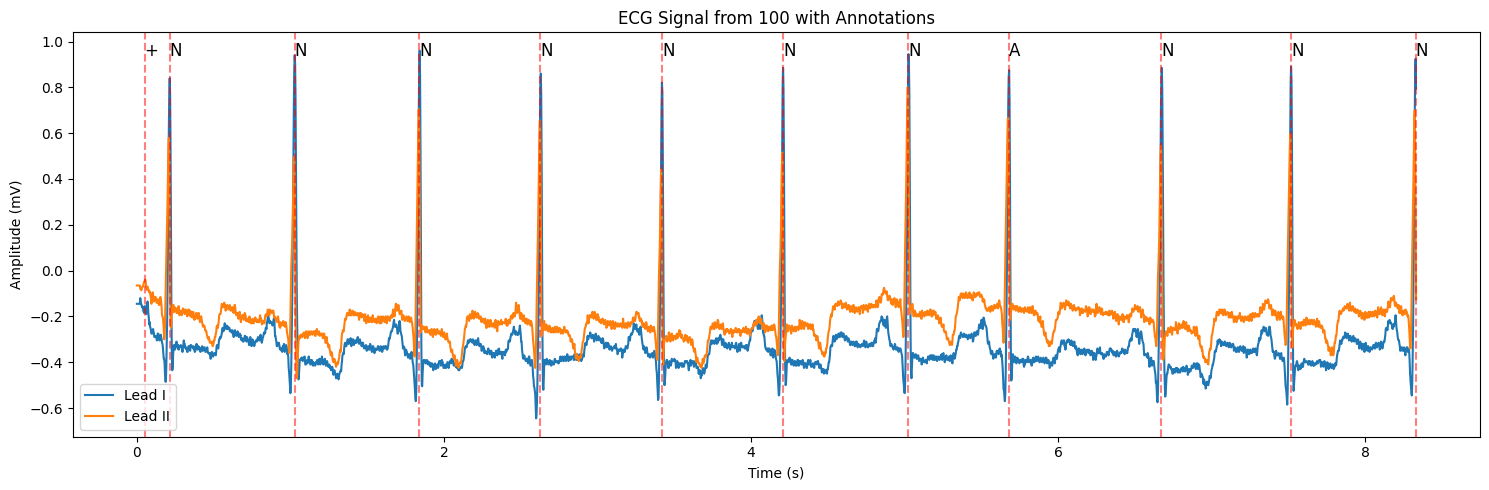


Annotation Descriptions:
   Symbol                                Description
0       N                                Normal beat
1       L              Left bundle branch block beat
2       R             Right bundle branch block beat
3       B     Bundle branch block beat (unspecified)
4       A                      Atrial premature beat
5       a            Aberrated atrial premature beat
6       J          Nodal (junctional) premature beat
7       S            Supraventricular premature beat
8       V          Premature ventricular contraction
9       r   R-on-T premature ventricular contraction
10      F      Fusion of ventricular and normal beat
11      e                         Atrial escape beat
12      j             Nodal (junctional) escape beat
13      n               Supraventricular escape beat
14      E                    Ventricular escape beat
15      /                                 Paced beat
16      f            Fusion of paced and normal beat
17      Q           

In [7]:
# Explore one record
sample_record_num = record_nums[0]  # Starting with record 100
record, ann = explore_record(sample_record_num)

# Print record information
print(f"Record information:")
print(f"- Record name: {record.record_name}")
print(f"- Number of signals: {record.n_sig}")
print(f"- Signal names: {record.sig_name}")
print(f"- Sampling frequency: {record.fs} Hz")
print(f"- Number of samples: {record.sig_len}")
print(f"- Duration: {record.sig_len / record.fs:.2f} seconds")

# Print annotation information
print(f"\nAnnotation information:")
print(f"- Number of annotations: {len(ann.sample)}")
print(f"- Symbols used: {np.unique(ann.symbol)}")

# Plot a segment of ECG with annotations
plot_ecg_with_annotations(record, ann)

# Get annotation descriptions
ann_descriptions = get_annotation_descriptions()
print("\nAnnotation Descriptions:")
print(ann_descriptions)


## Signal Processing and Segmentation


In [8]:
import wfdb
import numpy as np
import pandas as pd
import os
from tqdm.notebook import tqdm
from scipy import signal
from sklearn.preprocessing import StandardScaler

def load_and_process_record(record_number, path=os.path.join(DATA_DIR, 'mit-bih'),
                            window_size=256, overlap=0.5):
    """
    Load and process a record from the MIT-BIH database
    """
    # Read the record
    record_path = os.path.join(path, record_number)
    record = wfdb.rdrecord(record_path)

    # Read the annotations
    ann = wfdb.rdann(record_path, 'atr')

    # Extract the signals
    signals = record.p_signal
    fs = record.fs

    # Normalize the signals (per channel)
    normalized_signals = np.zeros_like(signals)
    for i in range(signals.shape[1]):
        normalized_signals[:, i] = (signals[:, i] - np.mean(signals[:, i])) / np.std(signals[:, i])

    # Segment the signals
    step = int(window_size * (1 - overlap))
    segments = []

    for start in range(0, len(normalized_signals) - window_size + 1, step):
        end = start + window_size

        # Extract the segment
        segment = normalized_signals[start:end, :]

        # Find annotations within this segment
        ann_indices = np.where((ann.sample >= start) & (ann.sample < end))[0]
        if len(ann_indices) == 0:
            continue  # Skip segments without annotations

        # Count the occurrence of each label in this segment
        labels = {}
        for idx in ann_indices:
            symbol = ann.symbol[idx]
            if symbol not in labels:
                labels[symbol] = 0
            labels[symbol] += 1

        # Determine the predominant label
        predominant_label = max(labels.items(), key=lambda x: x[1])[0]

        # Skip non-beat annotations
        if predominant_label not in ['N', 'L', 'R', 'B', 'A', 'a', 'J', 'S', 'V', 'r', 'F', 'e', 'j', 'n', 'E', '/', 'f', 'Q', '?']:
            continue

        # Add to segments
        segments.append({
            'signal': segment,
            'label': predominant_label,
            'record': record_number,
            'start_sample': start,
            'end_sample': end
        })

    return segments


The `load_and_process_record()` function handles the loading, preprocessing, and segmentation of ECG records from the MIT-BIH Arrhythmia Database.

### Function Parameters

- `record_number`: Identifier of the record to process
- `path`: Directory containing the database files
- `window_size`: Number of samples in each segment (default: 256)
- `overlap`: Fraction of overlap between consecutive segments (default: 0.5)

### Processing Steps

1. Signal Loading:
   - Loads ECG signal data using `wfdb.rdrecord()`
   - Loads annotations using `wfdb.rdann()`
   - Extracts the sampling frequency from the record

2. Signal Normalization:
   - Normalizes each channel independently
   - Subtracts mean and divides by standard deviation

3. Signal Segmentation:
   - Divides the signal into overlapping windows
   - Uses the specified window size and overlap percentage
   - Calculates step size based on window size and overlap

4. Annotation Processing:
   - Identifies annotations within each segment
   - Skips segments without annotations
   - Counts occurrence of each annotation type
   - Determines predominant label for each segment
   - Filters out segments with non-beat annotations

### Output

The function returns a list of dictionaries, each containing:
- `signal`: Normalized signal segment
- `label`: Predominant annotation label
- `record`: Source record number
- `start_sample`: Starting index of the segment
- `end_sample`: Ending index of the segment

## Feature Extraction

The `extract_features()` function derives a set of features from each ECG signal segment for use in the classification model.



In [9]:
def extract_features(segment):
    """
    Extract features from a segment
    """
    signal_data = segment['signal']

    features = {}

    # Basic statistical features (per channel)
    for i in range(signal_data.shape[1]):
        channel = signal_data[:, i]

        features[f'mean_ch{i+1}'] = np.mean(channel)
        features[f'std_ch{i+1}'] = np.std(channel)
        features[f'min_ch{i+1}'] = np.min(channel)
        features[f'max_ch{i+1}'] = np.max(channel)
        features[f'range_ch{i+1}'] = np.max(channel) - np.min(channel)
        features[f'rms_ch{i+1}'] = np.sqrt(np.mean(np.square(channel)))
        features[f'skewness_ch{i+1}'] = np.mean(((channel - np.mean(channel)) / np.std(channel)) ** 3)
        features[f'kurtosis_ch{i+1}'] = np.mean(((channel - np.mean(channel)) / np.std(channel)) ** 4) - 3

    # Frequency domain features
    for i in range(signal_data.shape[1]):
        channel = signal_data[:, i]

        # Compute Fourier Transform
        fft_values = np.fft.rfft(channel)
        fft_magnitudes = np.abs(fft_values)

        # Spectral features
        features[f'max_freq_ch{i+1}'] = np.argmax(fft_magnitudes)
        features[f'mean_freq_ch{i+1}'] = np.mean(fft_magnitudes)
        features[f'median_freq_ch{i+1}'] = np.median(fft_magnitudes)
        features[f'spectral_entropy_ch{i+1}'] = -np.sum(fft_magnitudes * np.log2(fft_magnitudes + 1e-10))

    # Add the original label
    features['label'] = segment['label']
    features['record'] = segment['record']

    return features


### Function Parameters

- `segment`: Dictionary containing the normalized signal segment and metadata

### Extracted Features

#### Time-Domain Features (per channel)

- Mean: Average amplitude value
- Standard Deviation: Measure of signal variation
- Minimum: Lowest amplitude value
- Maximum: Highest amplitude value
- Range: Difference between maximum and minimum
- RMS: Root mean square value
- Skewness: Measure of distribution asymmetry
- Kurtosis: Measure of distribution tailedness

#### Frequency-Domain Features (per channel)

- Maximum Frequency: Frequency with highest magnitude
- Mean Frequency: Average of frequency magnitudes
- Median Frequency: Median of frequency magnitudes
- Spectral Entropy: Measure of frequency distribution randomness

### Output

The function returns a dictionary containing:
- All calculated features with channel-specific keys
- Original annotation label
- Source record identifier

## Heart Rate Variability (HRV) Feature Extraction

This section implements functions for detecting R-peaks and extracting heart rate variability features.



In [10]:
def detect_r_peaks(signal_data, fs=360):
    """
    Detect R-peaks in an ECG signal
    """
    # Filter the signal to enhance QRS complex
    filtered_signal = signal.butter(3, [5, 15], 'bandpass', fs=fs, output='sos')
    filtered_signal = signal.sosfilt(filtered_signal, signal_data)

    # Take the absolute value
    filtered_signal = np.abs(filtered_signal)

    # Find peaks
    r_peaks, _ = signal.find_peaks(filtered_signal, height=0.5*np.max(filtered_signal), distance=0.2*fs)

    return r_peaks

def extract_hrv_features(segment, fs=360):
    """
    Extract HRV features from a segment
    """
    signal_data = segment['signal']

    features = {}

    # Detect R-peaks (use lead II, which is usually clearer for R-peaks)
    r_peaks = detect_r_peaks(signal_data[:, 1], fs)

    if len(r_peaks) < 2:
        # Not enough R-peaks for HRV analysis
        features['rr_mean'] = 0
        features['rr_std'] = 0
        features['rr_rmssd'] = 0
        features['hr_mean'] = 0
        return features

    # Calculate RR intervals (in seconds)
    rr_intervals = np.diff(r_peaks) / fs

    # Basic HRV features
    features['rr_mean'] = np.mean(rr_intervals)
    features['rr_std'] = np.std(rr_intervals)

    # Root mean square of successive differences (RMSSD)
    rr_diffs = np.diff(rr_intervals)
    features['rr_rmssd'] = np.sqrt(np.mean(rr_diffs ** 2)) if len(rr_diffs) > 0 else 0

    # Mean heart rate
    features['hr_mean'] = 60 / features['rr_mean'] if features['rr_mean'] > 0 else 0

    return features

### R-Peak Detection

The `detect_r_peaks()` function identifies R-peaks in an ECG signal using the following steps:

- Parameters:
  - `signal_data`: ECG signal array
  - `fs`: Sampling frequency (default: 360 Hz)

- Processing steps:
  - Applies a bandpass filter (5-15 Hz) to enhance QRS complexes
  - Uses a Butterworth filter with order 3
  - Takes absolute value of the filtered signal
  - Locates peaks using amplitude threshold (50% of maximum)
  - Enforces minimum distance between peaks (0.2 * sampling frequency)

- Returns an array of R-peak indices

### HRV Feature Extraction

The `extract_hrv_features()` function computes heart rate variability metrics from the detected R-peaks:

- Parameters:
  - `segment`: Dictionary containing the signal segment and metadata
  - `fs`: Sampling frequency (default: 360 Hz)

- Processing steps:
  - Detects R-peaks in lead II of the ECG signal
  - Calculates RR intervals (time between consecutive R-peaks)
  - Converts intervals to seconds by dividing by sampling frequency
  - Computes HRV statistics

- Extracted features:
  - `rr_mean`: Mean RR interval
  - `rr_std`: Standard deviation of RR intervals
  - `rr_rmssd`: Root mean square of successive differences
  - `hr_mean`: Mean heart rate (beats per minute)

The function includes error handling for cases with insufficient R-peaks (<2) for proper HRV analysis.

Processing all records and extracting features...


  0%|          | 0/48 [00:00<?, ?it/s]

Visualizing sample segments by class...


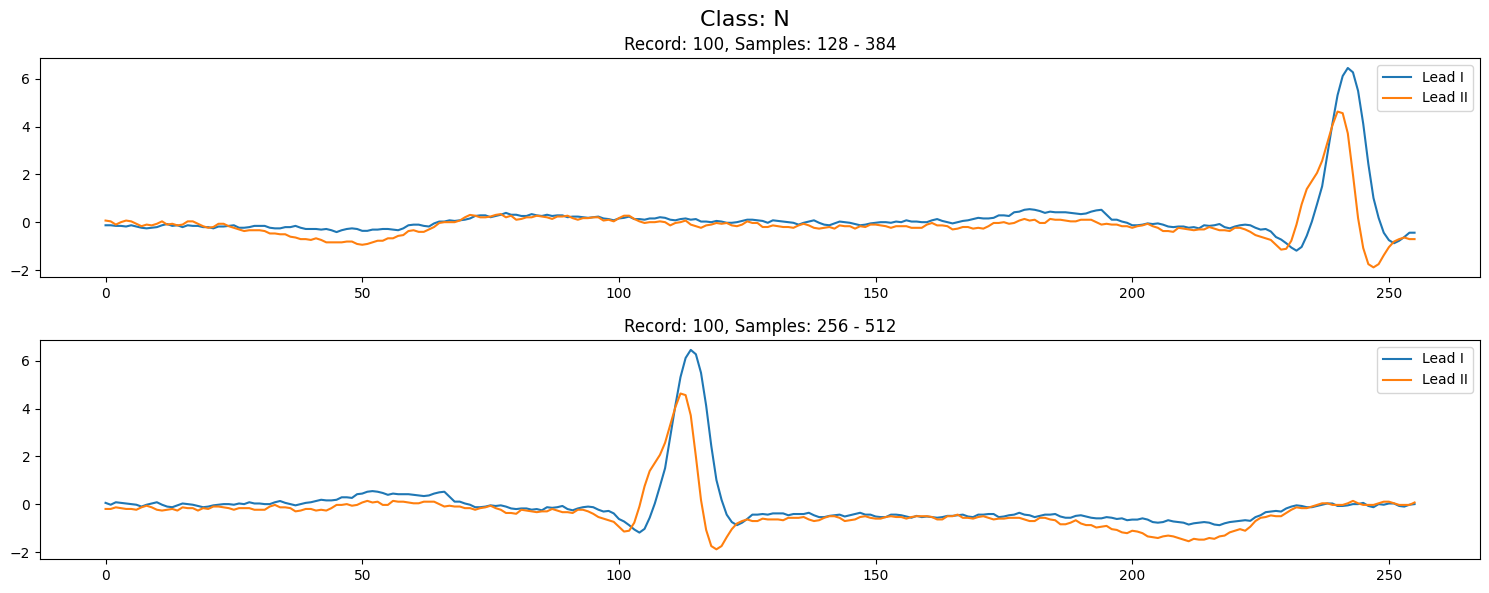

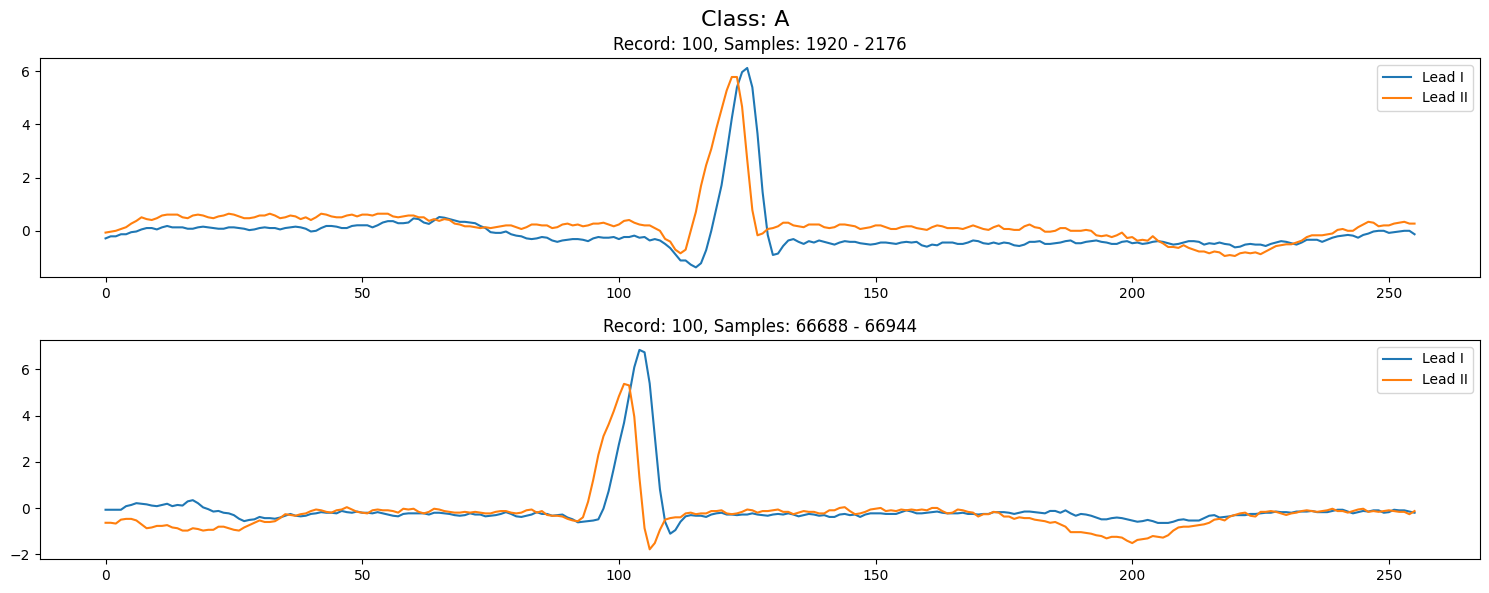

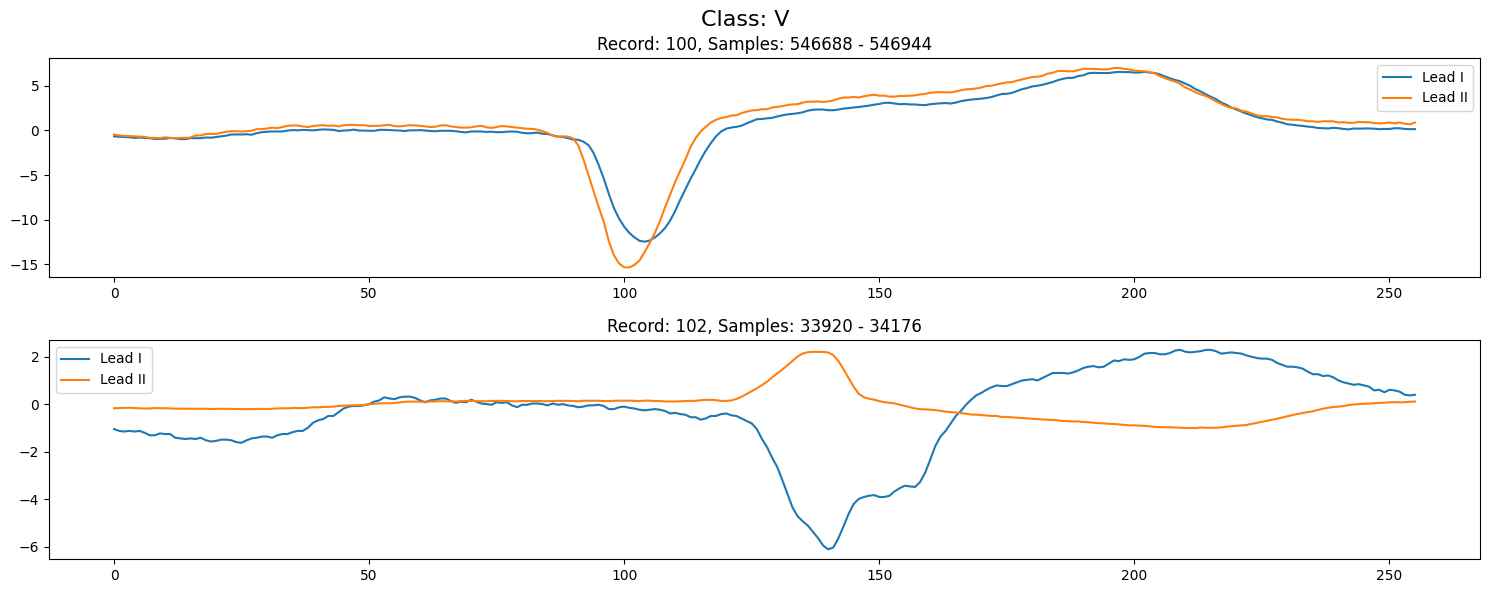

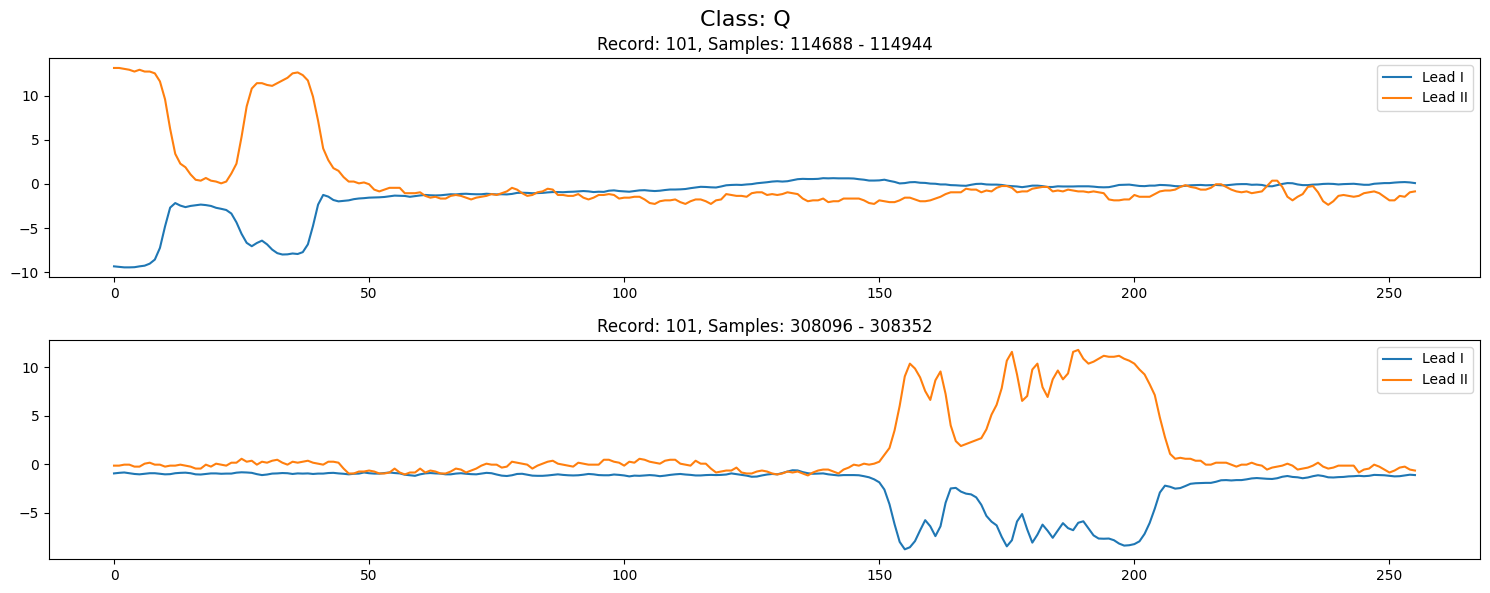

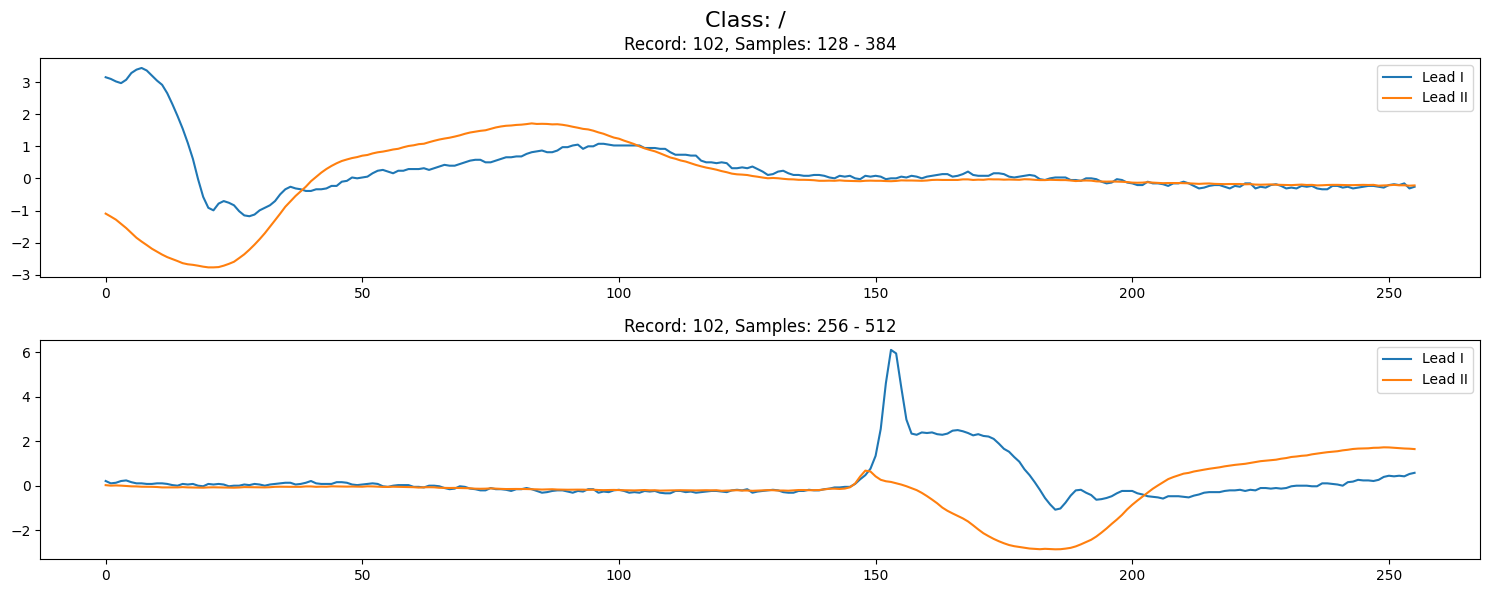

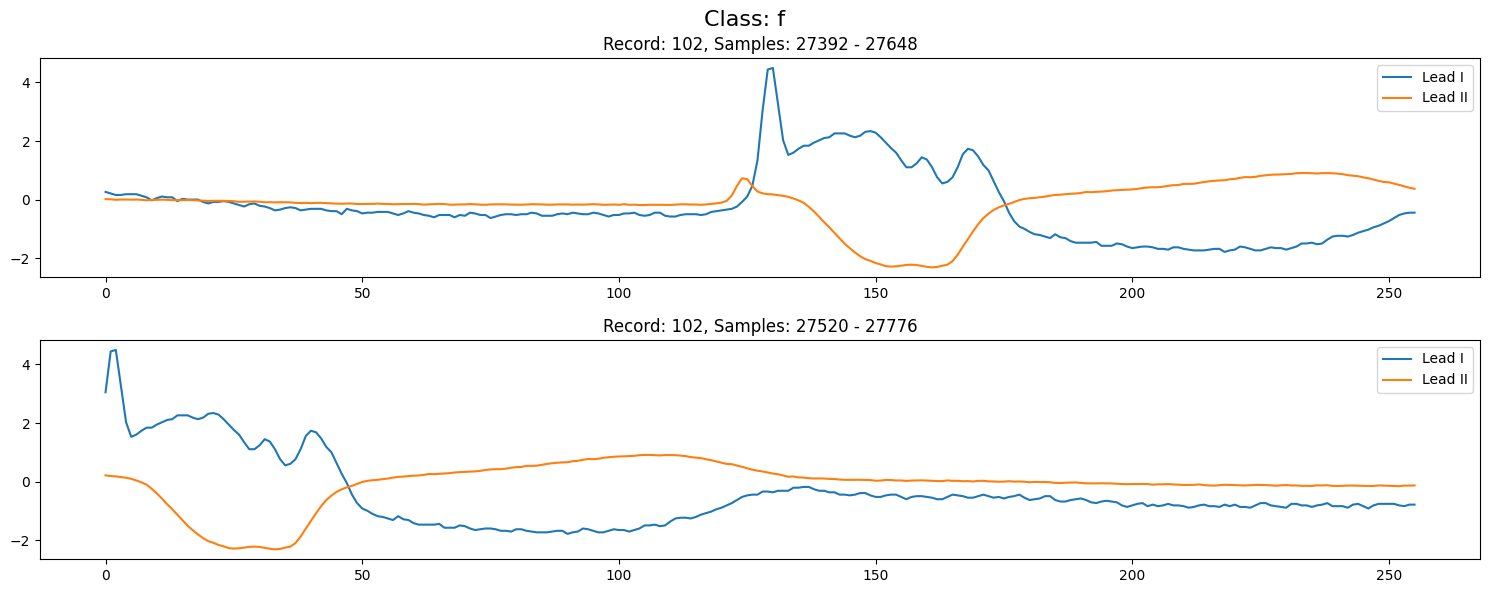

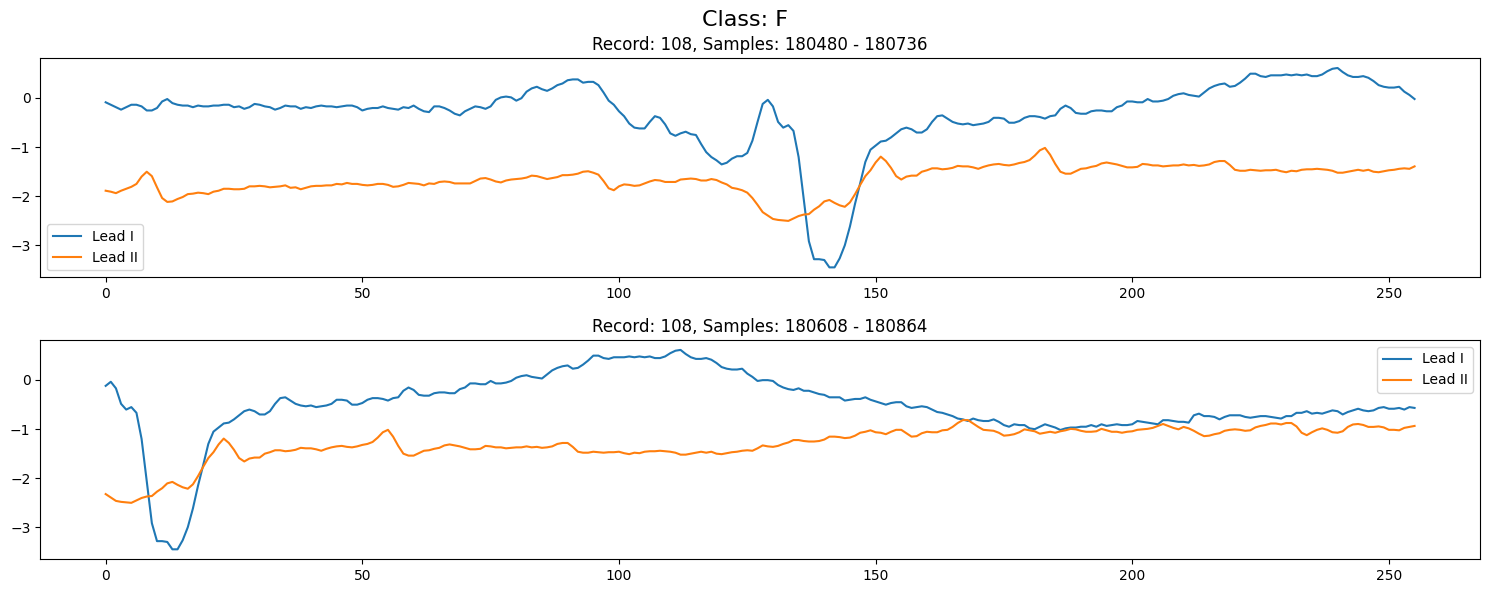

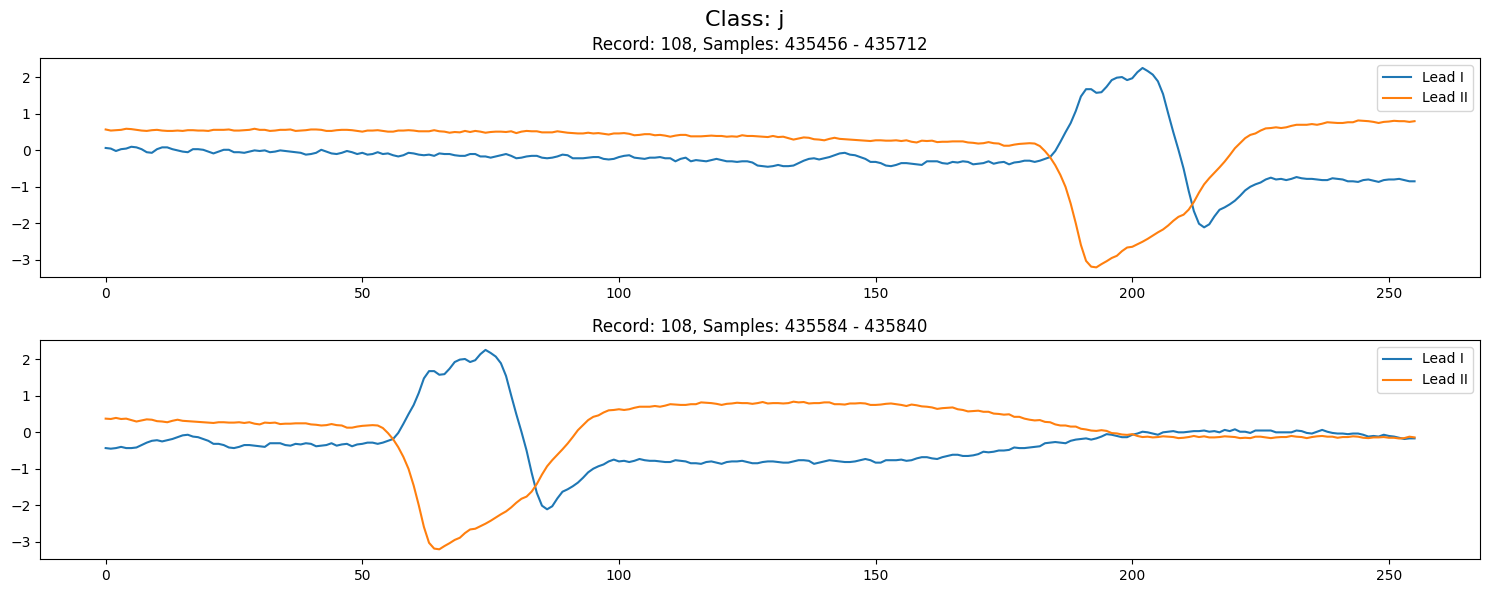

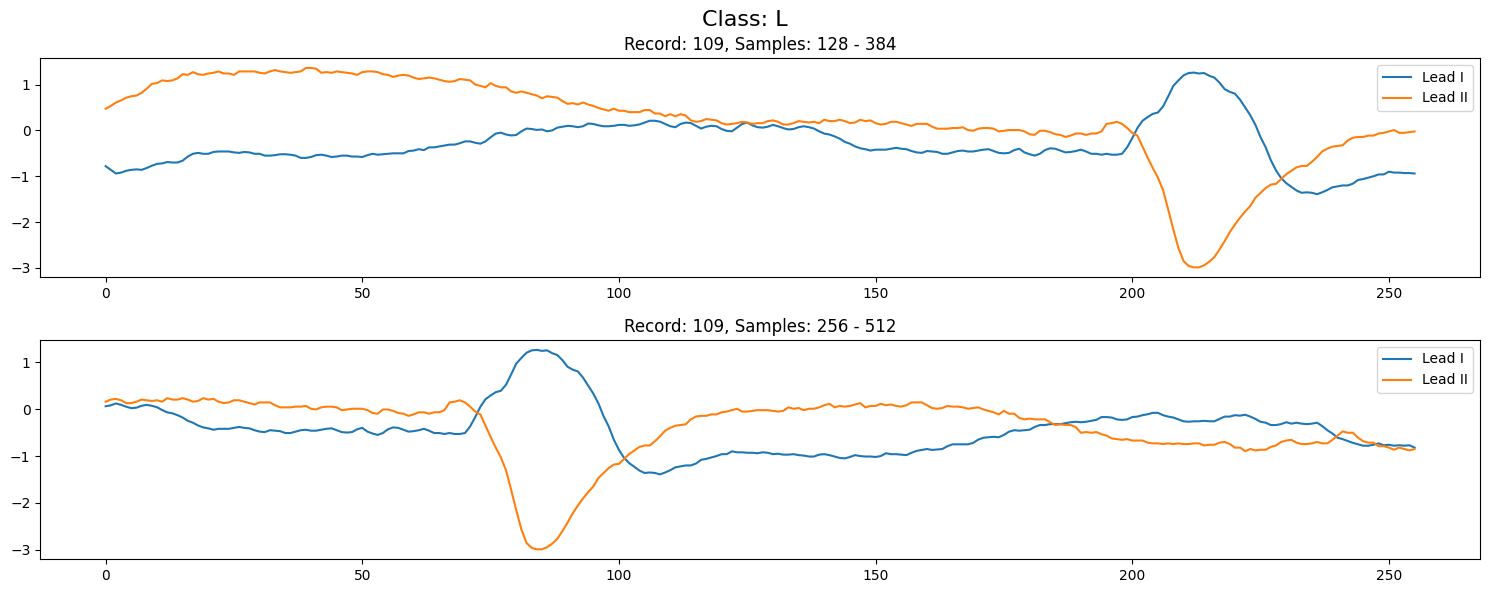

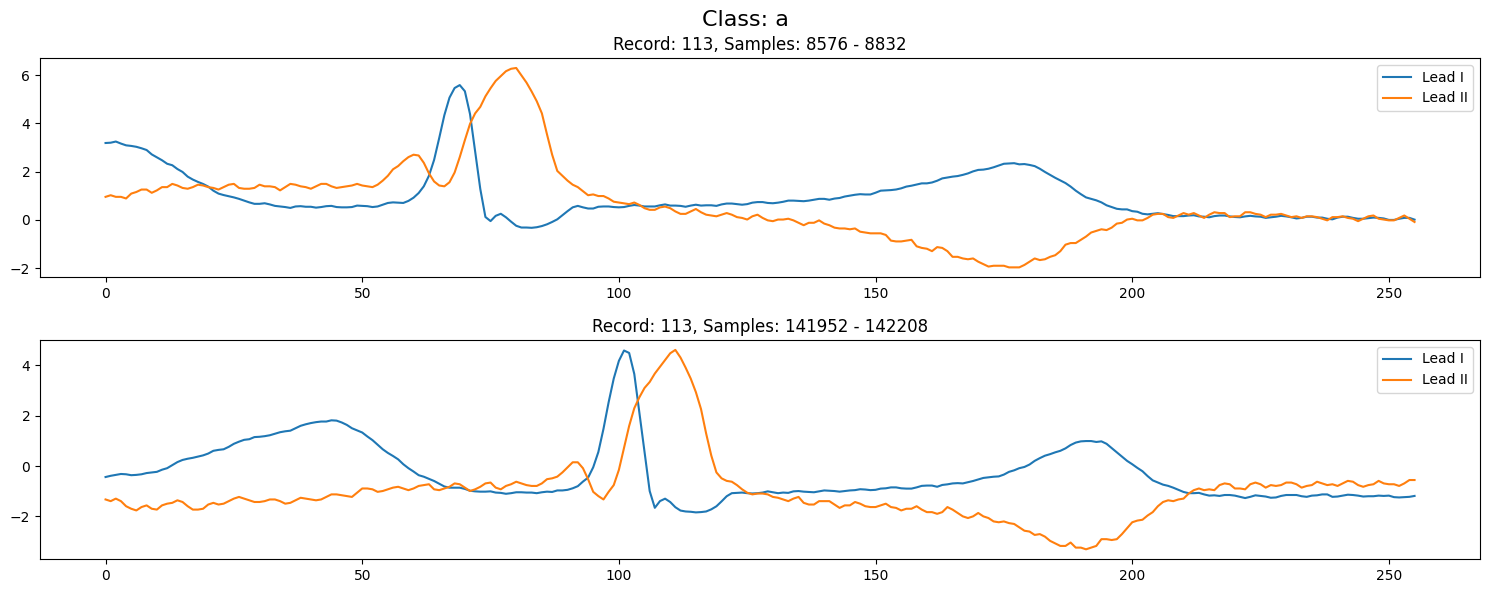

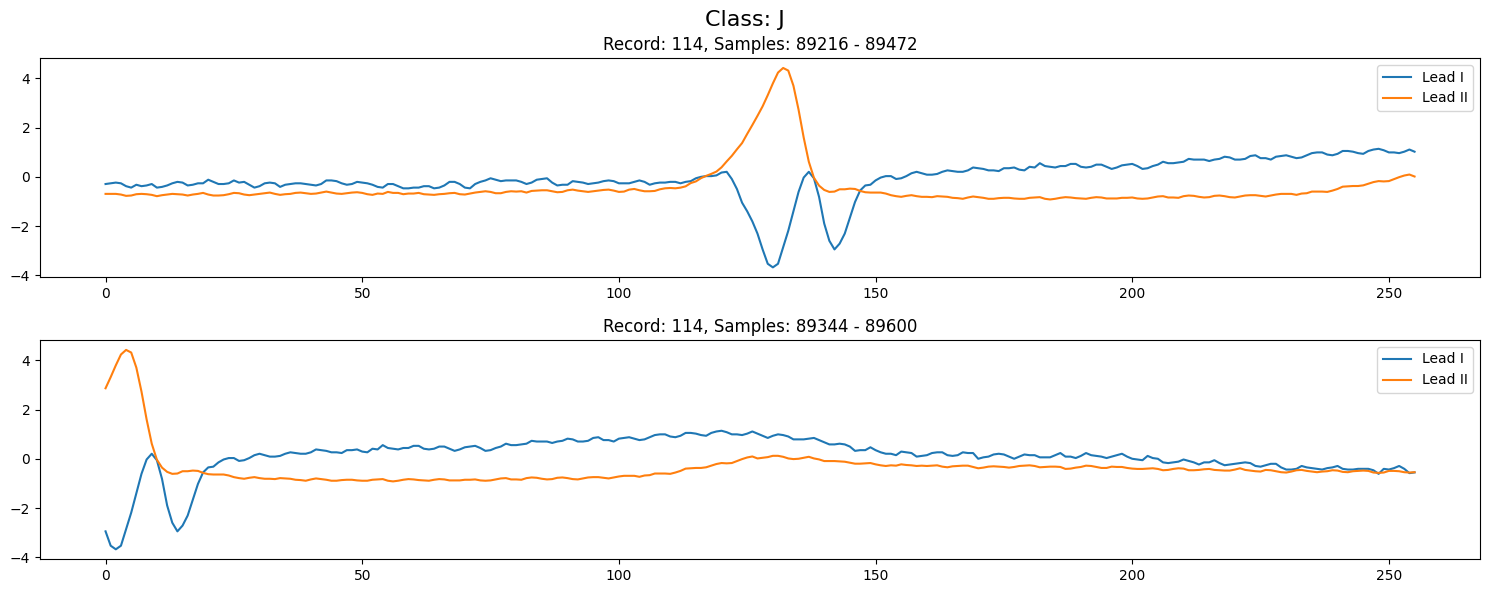

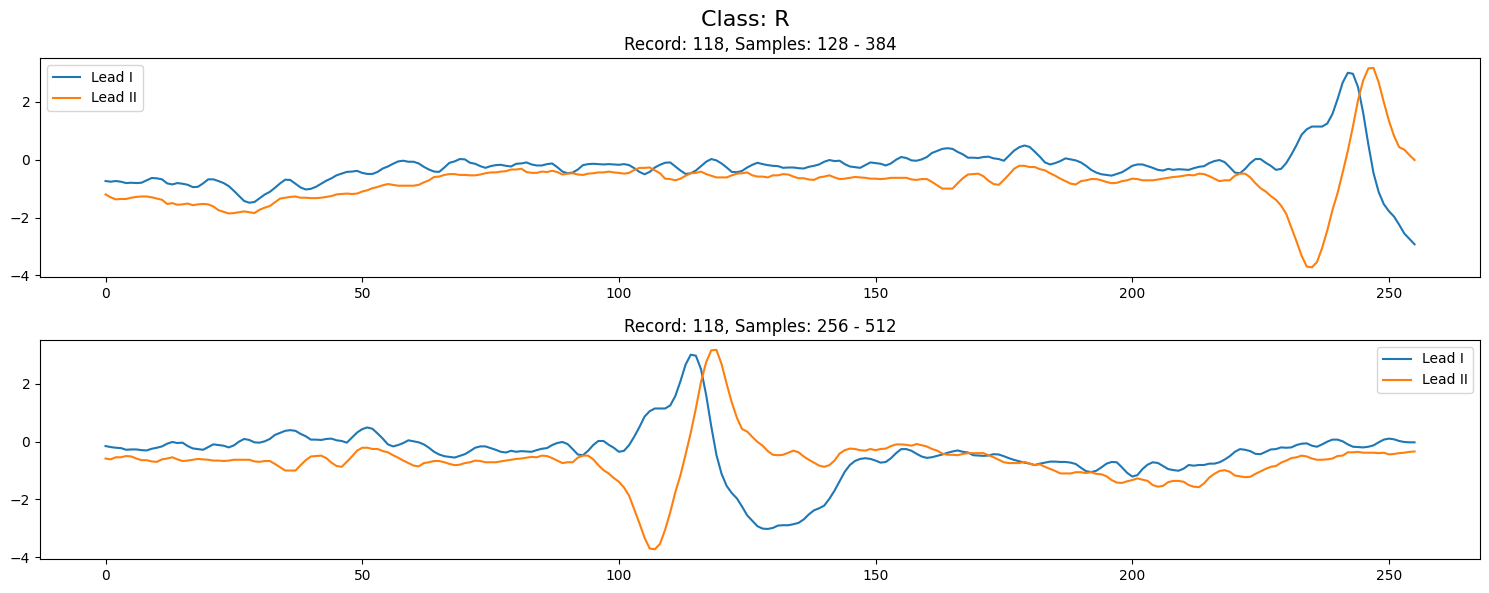

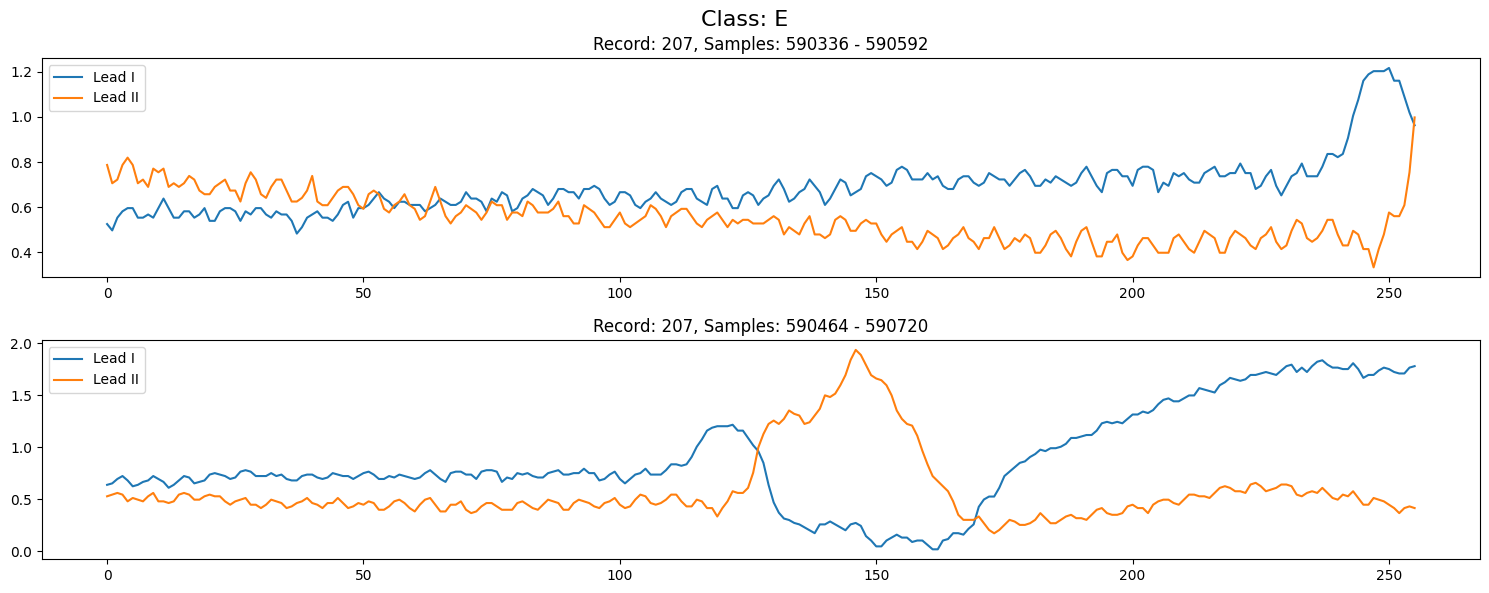

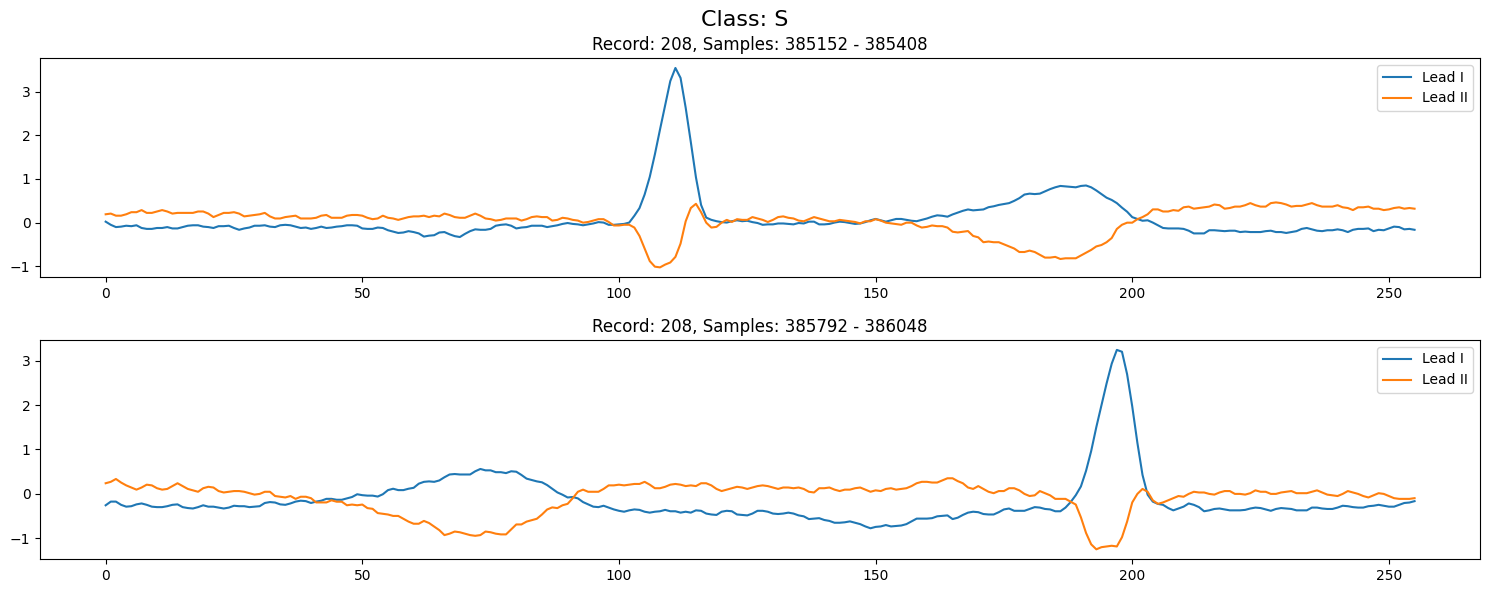

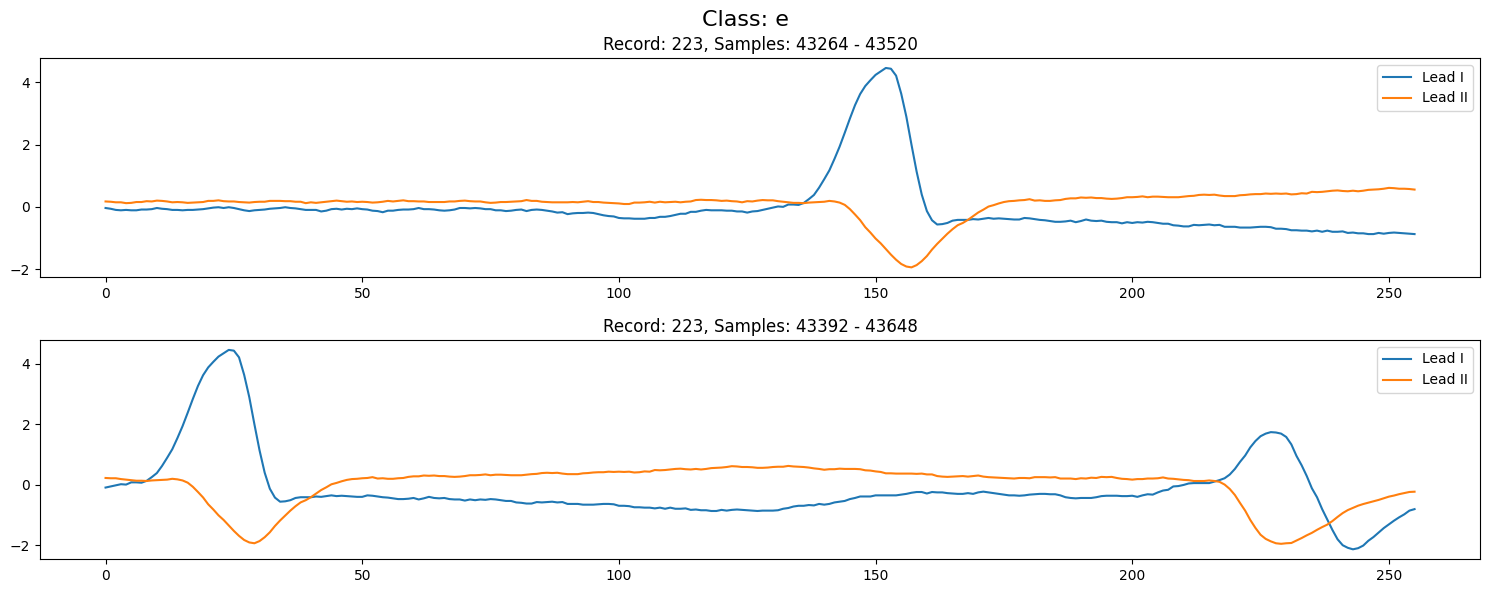

Class distribution:
category
Normal                 141188
Bundle_Branch_Block     30141
Paced                   13987
Ventricular             10204
Supraventricular         5131
Fusion                   3225
Unknown                    57
Name: count, dtype: int64
Saving processed data...
Data preprocessing complete!


In [11]:
def preprocess_all_records(record_nums, path=os.path.join(DATA_DIR, 'mit-bih'),
                           window_size=256, overlap=0.5):
    """
    Preprocess all records and extract features
    """
    all_segments = []
    all_features = []

    for record in tqdm(record_nums):
        # Load and process the record
        segments = load_and_process_record(record, path, window_size, overlap)

        # Extract features for each segment
        for segment in segments:
            # Basic features
            features = extract_features(segment)

            # HRV features
            hrv_features = extract_hrv_features(segment)

            # Combine features
            features.update(hrv_features)

            # Add to lists
            all_segments.append(segment)
            all_features.append(features)

    # Convert to DataFrame
    data = pd.DataFrame(all_features)

    return data, all_segments

def visualize_segments_by_class(segments, n_samples=3):
    """
    Visualize segments by class
    """
    # Group segments by label
    segments_by_label = {}
    for segment in segments:
        label = segment['label']
        if label not in segments_by_label:
            segments_by_label[label] = []
        segments_by_label[label].append(segment)

    # Plot n_samples per class
    for label, segments_list in segments_by_label.items():
        if len(segments_list) < n_samples:
            n_samples_label = len(segments_list)
        else:
            n_samples_label = n_samples

        plt.figure(figsize=(15, n_samples_label * 3))
        plt.suptitle(f'Class: {label}', fontsize=16)

        for i in range(n_samples_label):
            segment = segments_list[i]
            plt.subplot(n_samples_label, 1, i+1)
            plt.plot(segment['signal'][:, 0], label='Lead I')
            plt.plot(segment['signal'][:, 1], label='Lead II')
            plt.title(f"Record: {segment['record']}, Samples: {segment['start_sample']} - {segment['end_sample']}")
            plt.legend()

        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        plt.show()

def map_labels_to_categories(data):
    """
    Map detailed annotation symbols to broader categories
    """
    # Define mapping
    label_to_category = {
        # Normal
        'N': 'Normal',

        # Supraventricular
        'A': 'Supraventricular',
        'a': 'Supraventricular',
        'J': 'Supraventricular',
        'S': 'Supraventricular',
        'e': 'Supraventricular',
        'j': 'Supraventricular',
        'n': 'Supraventricular',

        # Ventricular
        'V': 'Ventricular',
        'r': 'Ventricular',
        'E': 'Ventricular',

        # Fusion
        'F': 'Fusion',
        'f': 'Fusion',

        # Bundle Branch Block
        'L': 'Bundle_Branch_Block',
        'R': 'Bundle_Branch_Block',
        'B': 'Bundle_Branch_Block',

        # Paced
        '/': 'Paced',

        # Unknown or unclassifiable
        '?': 'Unknown',
        'Q': 'Unknown'
    }

    # Add category column
    data['category'] = data['label'].map(label_to_category)

    return data

# Process all records
print("Processing all records and extracting features...")
data, segments = preprocess_all_records(record_nums)

# Map labels to categories
data = map_labels_to_categories(data)

# Visualize some segments
print("Visualizing sample segments by class...")
visualize_segments_by_class(segments, n_samples=2)

# Print class distribution
print("Class distribution:")
print(data['category'].value_counts())

# Save processed data
print("Saving processed data...")
processed_dir = os.path.join(DATA_DIR, 'processed')
data.to_csv(os.path.join(processed_dir, 'features.csv'), index=False)
np.save(os.path.join(processed_dir, 'segments.npy'), segments)
print("Data preprocessing complete!")

## Dataset Preparation

This section prepares the processed ECG data for machine learning model training.

### Overview

The dataset preparation process involves:

1. **Creating a Custom Dataset Structure**:
   - Organizes ECG data in a format suitable for model training
   - Enables efficient loading of data during training

2. **Two Parallel Approaches**:
   - **Feature-based approach**: Uses the extracted statistical and frequency-domain features
   - **Raw signal approach**: Uses the preprocessed ECG waveforms directly

3. **Data Splitting**:
   - Training set (70%): Used to train the model
   - Validation set (10%): Used to tune model parameters
   - Test set (20%): Used for final evaluation

4. **Handling Class Imbalance**:
   - Calculates weights for each arrhythmia class
   - Gives higher importance to underrepresented arrhythmia types
   - Ensures the model learns to recognize rare conditions

5. **Class Mapping**:
   - Groups detailed beat annotations into broader clinical categories
   - Simplifies classification while maintaining clinical relevance
   - Categories include: Normal, Ventricular, Supraventricular, Bundle Branch Block, etc.

6. **Data Standardization**:
   - Normalizes features to have zero mean and unit variance
   - Makes training more stable and improves model convergence

7. **Dataset Visualization**:
   - Shows distribution of different arrhythmia types
   - Highlights class imbalance challenges

8. **Data Persistence**:
   - Saves prepared datasets for consistent model training
   - Preserves class mappings and feature information

Preparing datasets using extracted features...
Class mapping:
0: Bundle_Branch_Block
1: Fusion
2: Normal
3: Paced
4: Supraventricular
5: Unknown
6: Ventricular


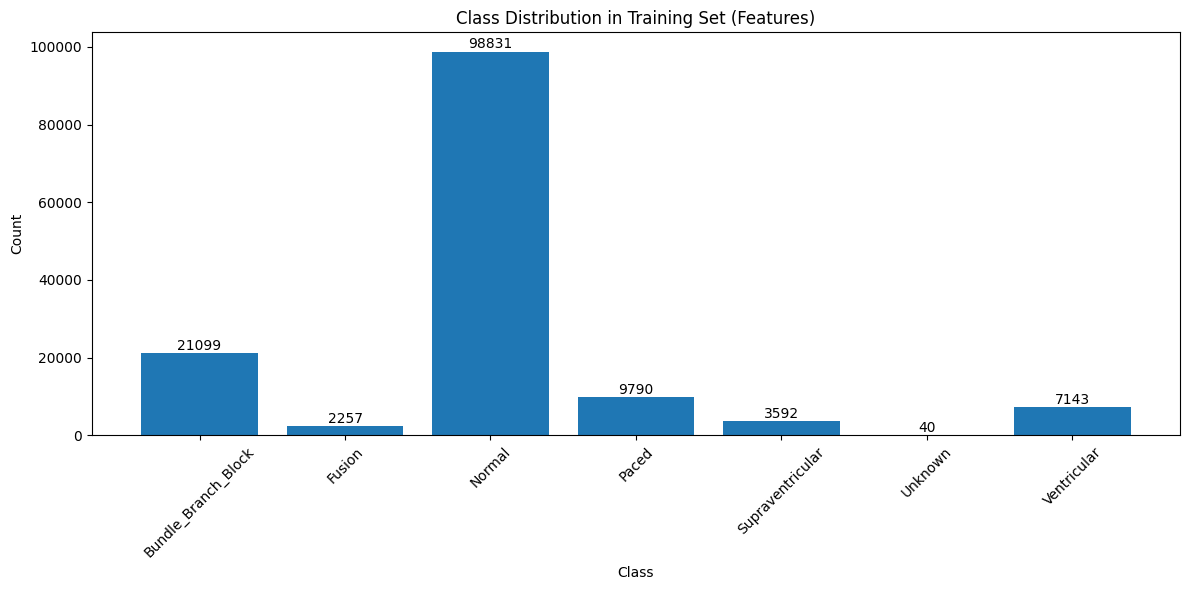

Preparing datasets using raw segments...
Class mapping:
0: Bundle_Branch_Block
1: Fusion
2: Normal
3: Paced
4: Supraventricular
5: Unknown
6: Ventricular


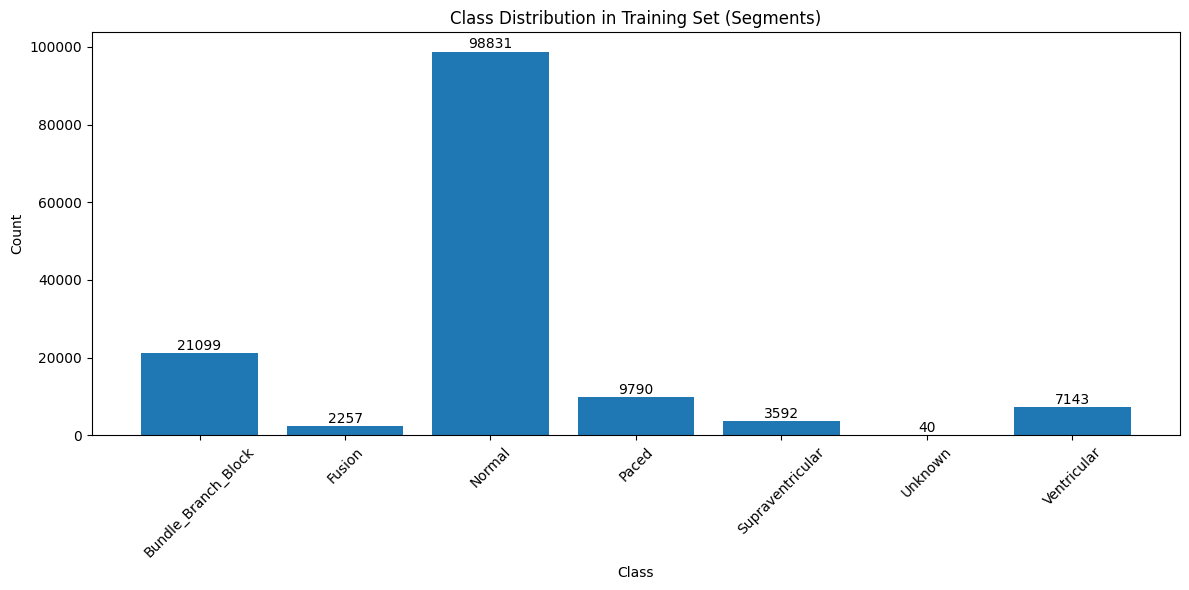

Dataset preparation complete!


In [12]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

class ECGDataset(Dataset):
    """
    PyTorch Dataset for ECG signals
    """
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# %% [code]
def prepare_datasets(data, segments, test_size=0.2, val_size=0.1, random_state=42):
    """
    Prepare train, validation, and test datasets using extracted features
    """
    # Remove rows with NaN values
    data = data.dropna()

    # Define feature columns (all except 'label', 'record', and 'category')
    feature_columns = [col for col in data.columns if col not in ['label', 'record', 'category']]

    # Prepare features and target
    X = data[feature_columns].values

    # Encode the target
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(data['category'])

    # Print class mapping
    class_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}
    print("Class mapping:")
    for i, label in class_mapping.items():
        print(f"{i}: {label}")

    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split into train+val and test
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    # Split train+val into train and val
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_size/(1-test_size), random_state=random_state, stratify=y_temp)

    # Calculate class weights for imbalanced classes
    class_counts = np.bincount(y_train)
    class_weights = 1.0 / torch.Tensor(class_counts)
    class_weights = class_weights / class_weights.sum() * len(class_counts)

    # Create datasets
    train_dataset = ECGDataset(X_train, y_train)
    val_dataset = ECGDataset(X_val, y_val)
    test_dataset = ECGDataset(X_test, y_test)

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    return train_loader, val_loader, test_loader, class_weights, label_encoder, feature_columns

# %% [code]
def prepare_segments_dataset(segments, test_size=0.2, val_size=0.1, random_state=42):
    """
    Prepare train, validation, and test datasets using raw segments
    """
    # Extract signals and labels
    X = []
    y_raw = []

    for segment in segments:
        X.append(segment['signal'])
        y_raw.append(segment['label'])

    # Convert to numpy arrays
    X = np.array(X)

    # Map raw labels to categories
    label_to_category = {
        # Normal
        'N': 'Normal',

        # Supraventricular
        'A': 'Supraventricular',
        'a': 'Supraventricular',
        'J': 'Supraventricular',
        'S': 'Supraventricular',
        'e': 'Supraventricular',
        'j': 'Supraventricular',
        'n': 'Supraventricular',

        # Ventricular
        'V': 'Ventricular',
        'r': 'Ventricular',
        'E': 'Ventricular',

        # Fusion
        'F': 'Fusion',
        'f': 'Fusion',

        # Bundle Branch Block
        'L': 'Bundle_Branch_Block',
        'R': 'Bundle_Branch_Block',
        'B': 'Bundle_Branch_Block',

        # Paced
        '/': 'Paced',

        # Unknown or unclassifiable
        '?': 'Unknown',
        'Q': 'Unknown'
    }

    y_categories = [label_to_category.get(label, 'Unknown') for label in y_raw]

    # Encode the target
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y_categories)

    # Print class mapping
    class_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}
    print("Class mapping:")
    for i, label in class_mapping.items():
        print(f"{i}: {label}")

    # Split into train+val and test
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    # Split train+val into train and val
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_size/(1-test_size), random_state=random_state, stratify=y_temp)

    # Calculate class weights for imbalanced classes
    class_counts = np.bincount(y_train)
    class_weights = 1.0 / torch.Tensor(class_counts)
    class_weights = class_weights / class_weights.sum() * len(class_counts)

    # Create datasets
    train_dataset = ECGDataset(X_train, y_train)
    val_dataset = ECGDataset(X_val, y_val)
    test_dataset = ECGDataset(X_test, y_test)

    # Create dataloaders
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    return train_loader, val_loader, test_loader, class_weights, label_encoder

# %% [code]
def visualize_class_distribution(y, label_encoder, title="Class Distribution"):
    """
    Visualize class distribution
    """
    # Count class frequencies
    class_counts = np.bincount(y)

    # Get class names
    class_names = label_encoder.classes_

    # Plot
    plt.figure(figsize=(12, 6))
    bars = plt.bar(class_names, class_counts)

    # Add count labels on top of bars
    for bar, count in zip(bars, class_counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                 str(count), ha='center', va='bottom')

    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# %% [code]
# Load processed data
processed_dir = os.path.join(DATA_DIR, 'processed')
data = pd.read_csv(os.path.join(processed_dir, 'features.csv'))
segments = np.load(os.path.join(processed_dir, 'segments.npy'), allow_pickle=True)

# Prepare datasets using features
print("Preparing datasets using extracted features...")
train_loader, val_loader, test_loader, class_weights, label_encoder, feature_columns = prepare_datasets(data, segments)

# Visualize class distribution
y_train = np.array([y.item() for _, y in train_loader.dataset])
visualize_class_distribution(y_train, label_encoder, "Class Distribution in Training Set (Features)")

# Prepare datasets using raw segments
print("Preparing datasets using raw segments...")
segments_train_loader, segments_val_loader, segments_test_loader, segments_class_weights, segments_label_encoder = prepare_segments_dataset(segments)

# Visualize class distribution
segments_y_train = np.array([y.item() for _, y in segments_train_loader.dataset])
visualize_class_distribution(segments_y_train, segments_label_encoder, "Class Distribution in Training Set (Segments)")

# Save dataloaders, class weights, and label encoders
torch.save(train_loader, os.path.join(processed_dir, 'train_loader.pt'))
torch.save(val_loader, os.path.join(processed_dir, 'val_loader.pt'))
torch.save(test_loader, os.path.join(processed_dir, 'test_loader.pt'))
torch.save(class_weights, os.path.join(processed_dir, 'class_weights.pt'))

torch.save(segments_train_loader, os.path.join(processed_dir, 'segments_train_loader.pt'))
torch.save(segments_val_loader, os.path.join(processed_dir, 'segments_val_loader.pt'))
torch.save(segments_test_loader, os.path.join(processed_dir, 'segments_test_loader.pt'))
torch.save(segments_class_weights, os.path.join(processed_dir, 'segments_class_weights.pt'))

# Save label encoders
np.save(os.path.join(processed_dir, 'label_encoder_classes.npy'), label_encoder.classes_)
np.save(os.path.join(processed_dir, 'segments_label_encoder_classes.npy'), segments_label_encoder.classes_)

# Save feature columns
with open(os.path.join(processed_dir, 'feature_columns.txt'), 'w') as f:
    for col in feature_columns:
        f.write(col + '\n')

print("Dataset preparation complete!")


## XceptionTime: State-of-the-Art 1D Xception-based Architecture for Time Series


#### This model adapts the Xception architecture (which uses depthwise separable convolutions) for 1D time series data like ECG signals. The model incorporates:

1. Depthwise separable convolutions to efficiently process temporal patterns
2. Residual connections for improved gradient flow
3. Squeeze-and-Excitation blocks for adaptive feature recalibration
4. Global context attention to capture long-range dependencies
5. Multi-scale feature integration for capturing patterns at different time resolutions

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
from tqdm.notebook import tqdm
import os
import time
from torch.optim.lr_scheduler import ReduceLROnPlateau, CosineAnnealingWarmRestarts
from torchsummary import summary

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

class SqueezeExcitation(nn.Module):
    """
    Squeeze-and-Excitation block for channel recalibration
    """
    def __init__(self, channel, reduction=16):
        super(SqueezeExcitation, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1)
        return x * y.expand_as(x)

class SeparableConv1d(nn.Module):
    """
    Depthwise separable 1D convolution
    """
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, bias=True):
        super(SeparableConv1d, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, in_channels, kernel_size,
                               stride, padding, dilation, groups=in_channels, bias=bias)
        self.pointwise = nn.Conv1d(in_channels, out_channels, 1, 1, 0, 1, 1, bias=bias)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pointwise(x)
        return x

class XceptionBlock(nn.Module):
    """
    Xception block with residual connection
    """
    def __init__(self, in_channels, out_channels, kernel_size=15, stride=1, dilation=1, dropout=0.2, use_se=True):
        super(XceptionBlock, self).__init__()

        self.sepconv1 = SeparableConv1d(
            in_channels, out_channels, kernel_size, stride=stride,
            padding=(kernel_size - 1) // 2 * dilation, dilation=dilation
        )
        self.bn1 = nn.BatchNorm1d(out_channels)

        self.sepconv2 = SeparableConv1d(
            out_channels, out_channels, kernel_size, stride=1,
            padding=(kernel_size - 1) // 2 * dilation, dilation=dilation
        )
        self.bn2 = nn.BatchNorm1d(out_channels)

        self.relu = nn.ReLU(inplace=True)
        self.dropout = nn.Dropout(dropout)

        # SE block
        self.use_se = use_se
        if use_se:
            self.se = SqueezeExcitation(out_channels)

        # Residual connection
        self.residual = nn.Conv1d(in_channels, out_channels, kernel_size=1, stride=stride) if in_channels != out_channels or stride != 1 else nn.Identity()
        self.bn_res = nn.BatchNorm1d(out_channels) if in_channels != out_channels or stride != 1 else nn.Identity()

    def forward(self, x):
        residual = self.bn_res(self.residual(x))

        out = self.sepconv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout(out)

        out = self.sepconv2(out)
        out = self.bn2(out)

        if self.use_se:
            out = self.se(out)

        out = out + residual
        out = self.relu(out)

        return out

class GlobalContextAttention(nn.Module):
    """
    Global context attention module
    """
    def __init__(self, in_channels, reduction=16):
        super(GlobalContextAttention, self).__init__()
        self.conv_squeeze = nn.Conv1d(in_channels, 1, kernel_size=1, padding=0)
        self.bn = nn.BatchNorm1d(1)
        self.sigmoid = nn.Sigmoid()

        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // reduction),
            nn.ReLU(inplace=True),
            nn.Linear(in_channels // reduction, in_channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        # Spatial attention
        spatial_attn = self.sigmoid(self.bn(self.conv_squeeze(x)))
        x_spatial = x * spatial_attn

        # Channel attention
        b, c, _ = x.size()
        avg_pool = F.adaptive_avg_pool1d(x_spatial, 1).view(b, c)
        channel_attn = self.fc(avg_pool).view(b, c, 1)

        out = x * channel_attn
        return out

class XceptionTime(nn.Module):
    """
    XceptionTime: Adaptation of Xception architecture for time series classification
    """
    def __init__(self, input_channels=2, num_classes=5, initial_filters=64, depth=6, kernel_size=15, dropout=0.2):
        super(XceptionTime, self).__init__()

        # Input layer
        self.conv1 = nn.Conv1d(input_channels, initial_filters, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm1d(initial_filters)
        self.relu = nn.ReLU(inplace=True)
        self.pool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

        # Xception blocks with different dilation rates for multi-scale feature extraction
        self.blocks = nn.ModuleList()

        filters = initial_filters
        for i in range(depth):
            if i % 2 == 0 and i > 0:
                stride = 2
                filters *= 2
            else:
                stride = 1

            # Alternate between different dilation rates
            dilation = 2 ** (i % 3)

            self.blocks.append(
                XceptionBlock(
                    filters // 2 if i > 0 and stride == 2 else initial_filters if i == 0 else filters,
                    filters,
                    kernel_size=kernel_size,
                    stride=stride,
                    dilation=dilation,
                    dropout=dropout,
                    use_se=(i % 2 == 0)  # Add SE blocks to alternate layers
                )
            )

        # Global context attention
        self.global_context = GlobalContextAttention(filters)

        # Global pooling and classifier
        self.global_pool = nn.AdaptiveAvgPool1d(1)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(filters, num_classes)

        # Initialize weights
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm1d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def forward(self, x):
        # If x is in shape [batch_size, seq_len, channels], permute to [batch_size, channels, seq_len]
        if x.size(1) > x.size(2):
            x = x.permute(0, 2, 1)

        # Initial layers
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.pool(x)

        # Xception blocks
        for block in self.blocks:
            x = block(x)

        # Apply global context attention
        x = self.global_context(x)

        # Global pooling and classification
        x = self.global_pool(x)
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = self.fc(x)

        return x


Using device: cuda


## Model Training

This section implements the training function for our ECG arrhythmia classification model. The function includes:

- Learning rate scheduling
- Early stopping to prevent overfitting


The function returns both the trained model and a history dictionary containing the training metrics for visualization.

In [14]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=50,
                scheduler=None, early_stopping_patience=10, model_save_path='models', model_name='xceptiontime'):
    """
    Train the model with progress tracking, early stopping, and model checkpointing
    """
    # Create directory for saving models
    os.makedirs(model_save_path, exist_ok=True)

    # Initialize history
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': []
    }

    # Initialize early stopping variables
    best_val_loss = float('inf')
    best_val_acc = 0.0
    no_improvement_epochs = 0
    best_model_weights = model.state_dict()

    # Training loop
    for epoch in range(num_epochs):
        start_time = time.time()

        # Training phase
        model.train()
        train_loss = 0.0
        train_preds = []
        train_true = []

        for inputs, targets in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]'):
            inputs, targets = inputs.to(device), targets.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Statistics
            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            train_preds.extend(predicted.cpu().numpy())
            train_true.extend(targets.cpu().numpy())

        # Calculate training metrics
        train_loss = train_loss / len(train_loader.dataset)
        train_acc = accuracy_score(train_true, train_preds)

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_preds = []
        val_true = []

        with torch.no_grad():
            for inputs, targets in tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Val]'):
                inputs, targets = inputs.to(device), targets.to(device)

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, targets)

                # Statistics
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_preds.extend(predicted.cpu().numpy())
                val_true.extend(targets.cpu().numpy())

        # Calculate validation metrics
        val_loss = val_loss / len(val_loader.dataset)
        val_acc = accuracy_score(val_true, val_preds)

        # Step the scheduler
        if scheduler is not None:
            if isinstance(scheduler, ReduceLROnPlateau):
                scheduler.step(val_loss)  # For ReduceLROnPlateau
            else:
                scheduler.step()  # For other schedulers like CosineAnnealingWarmRestarts

        # Update history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

        # Calculate elapsed time
        elapsed_time = time.time() - start_time

        # Print epoch statistics
        print(f'Epoch {epoch+1}/{num_epochs} - '
              f'train_loss: {train_loss:.4f}, train_acc: {train_acc:.4f}, '
              f'val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}, '
              f'time: {elapsed_time:.2f}s')

        # Early stopping based on validation loss
        improvement = False
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            improvement = True

        # Also track best accuracy
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_weights = model.state_dict().copy()
            no_improvement_epochs = 0
            improvement = True

            # Save the best model
            torch.save(model.state_dict(), os.path.join(model_save_path, f'{model_name}_best.pth'))
            print(f"Saved model with best validation accuracy: {best_val_acc:.4f}")

        if not improvement:
            no_improvement_epochs += 1
        else:
            no_improvement_epochs = 0

        # Check if we should stop
        if no_improvement_epochs >= early_stopping_patience:
            print(f'Early stopping triggered after {epoch+1} epochs')
            break

    # Load the best model
    model.load_state_dict(best_model_weights)

    # Save the final model
    torch.save(model.state_dict(), os.path.join(model_save_path, f'{model_name}_final.pth'))

    return model, history

## Model Evaluation Function

This function performs comprehensive evaluation of the trained model on the test dataset. It calculates:

- Overall metrics: accuracy, precision, recall, F1-score
- Per-class performance metrics
- Confusion matrix
- Detailed classification report

The function returns a dictionary containing all evaluation metrics, which can be used for visualization and analysis of the model's performance across different arrhythmia classes.

In [15]:
def evaluate_model(model, test_loader, criterion, label_encoder):
    """
    Evaluate the model and calculate comprehensive metrics
    """
    # Set model to evaluation mode
    model.eval()

    # Initialize variables
    test_loss = 0.0
    preds = []
    true = []

    # Collect all predictions and probabilities
    all_probs = []

    # Evaluate
    with torch.no_grad():
        for inputs, targets in tqdm(test_loader, desc='Evaluating'):
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Get probabilities
            probs = F.softmax(outputs, dim=1)
            all_probs.append(probs.cpu().numpy())

            # Statistics
            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            preds.extend(predicted.cpu().numpy())
            true.extend(targets.cpu().numpy())

    # Concatenate all probabilities
    all_probs = np.concatenate(all_probs, axis=0)

    # Calculate metrics
    test_loss = test_loss / len(test_loader.dataset)
    accuracy = accuracy_score(true, preds)
    precision = precision_score(true, preds, average='weighted')
    recall = recall_score(true, preds, average='weighted')
    f1 = f1_score(true, preds, average='weighted')

    # Calculate per-class metrics
    class_precision = precision_score(true, preds, average=None)
    class_recall = recall_score(true, preds, average=None)
    class_f1 = f1_score(true, preds, average=None)

    # Confusion matrix
    conf_matrix = confusion_matrix(true, preds)

    # Get class names
    class_names = label_encoder.classes_

    # Detailed classification report
    class_report = classification_report(true, preds, target_names=class_names, output_dict=True)

    # Store metrics
    metrics = {
        'loss': test_loss,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'class_precision': class_precision,
        'class_recall': class_recall,
        'class_f1': class_f1,
        'confusion_matrix': conf_matrix,
        'class_names': class_names,
        'classification_report': class_report,
        'predictions': preds,
        'true_labels': true,
        'probabilities': all_probs
    }

    return metrics


## Visualization Functions

This section contains various functions for visualizing the model's performance and interpreting its results:

### Training History Visualization
The `plot_training_history` function creates dual plots showing training and validation loss/accuracy curves over epochs.

### Confusion Matrix Visualization
The `plot_confusion_matrix` function generates heatmap visualizations of the model's prediction errors with both:
- Normalized values (percentage)
- Raw counts

### Per-Class Metrics Visualization
The `plot_class_metrics` function creates bar charts comparing precision, recall, and F1-score for each arrhythmia class.

### Error Analysis Visualization
The `visualize_incorrect_predictions` function displays examples of misclassified ECG signals to help understand model errors.

### Model Interpretability
The `visualize_feature_attention` function implements a Grad-CAM-like approach to visualize which parts of the ECG signal the model focuses on when making predictions.

In [16]:
def plot_training_history(history, title='XceptionTime Training History'):
    """
    Plot training history with improved visualization
    """
    plt.figure(figsize=(15, 6))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss', color='#FF5733', linewidth=2)
    plt.plot(history['val_loss'], label='Validation Loss', color='#33A8FF', linewidth=2)
    plt.title('Loss', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy', color='#33FF57', linewidth=2)
    plt.plot(history['val_acc'], label='Validation Accuracy', color='#9B33FF', linewidth=2)
    plt.title('Accuracy', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.savefig('xceptiontime_training_history.png', dpi=300, bbox_inches='tight')
    plt.show()


def plot_confusion_matrix(conf_matrix, class_names, title='XceptionTime Confusion Matrix'):
    """
    Plot confusion matrix with improved visualization
    """
    plt.figure(figsize=(10, 8))

    # Normalize confusion matrix
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

    # Plot
    sns.heatmap(conf_matrix_norm, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, cbar=True)
    plt.title(title, fontsize=16)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.tight_layout()
    plt.savefig('xceptiontime_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Also plot the raw counts
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
                xticklabels=class_names, yticklabels=class_names, cbar=True)
    plt.title(f'{title} (Counts)', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.tight_layout()
    plt.savefig('xceptiontime_confusion_matrix_counts.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_class_metrics(metrics, title='XceptionTime Per-Class Metrics'):
    """
    Plot per-class metrics with improved visualization
    """
    plt.figure(figsize=(14, 7))

    # Get data
    class_names = metrics['class_names']
    class_precision = metrics['class_precision']
    class_recall = metrics['class_recall']
    class_f1 = metrics['class_f1']

    # Plot
    x = np.arange(len(class_names))
    width = 0.25

    bars1 = plt.bar(x - width, class_precision, width, label='Precision', color='#FF5733', alpha=0.8)
    bars2 = plt.bar(x, class_recall, width, label='Recall', color='#33A8FF', alpha=0.8)
    bars3 = plt.bar(x + width, class_f1, width, label='F1-score', color='#33FF57', alpha=0.8)

    # Add value labels on top of bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=9)

    add_labels(bars1)
    add_labels(bars2)
    add_labels(bars3)

    plt.title(title, fontsize=16)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.ylim(0, 1.15)  # Leave room for the value labels
    plt.xticks(x, class_names, rotation=45, ha='right')
    plt.legend(fontsize=12, loc='lower right')
    plt.grid(True, linestyle='--', alpha=0.3, axis='y')

    plt.tight_layout()
    plt.savefig('xceptiontime_class_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()


def visualize_incorrect_predictions(model, test_loader, label_encoder, num_samples=6):
    """
    Visualize incorrectly classified ECG signals
    """
    # Set model to evaluation mode
    model.eval()

    # Initialize lists to store misclassified samples
    incorrect_inputs = []
    true_labels = []
    pred_labels = []

    # Collect misclassified samples
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            # Find incorrectly classified samples
            incorrect_mask = (predicted != targets)

            if incorrect_mask.sum() > 0:
                incorrect_batch_inputs = inputs[incorrect_mask].cpu().numpy()
                incorrect_batch_true = targets[incorrect_mask].cpu().numpy()
                incorrect_batch_pred = predicted[incorrect_mask].cpu().numpy()

                incorrect_inputs.extend(incorrect_batch_inputs)
                true_labels.extend(incorrect_batch_true)
                pred_labels.extend(incorrect_batch_pred)

            if len(incorrect_inputs) >= num_samples:
                break

    # Limit to requested number of samples
    incorrect_inputs = incorrect_inputs[:num_samples]
    true_labels = true_labels[:num_samples]
    pred_labels = pred_labels[:num_samples]

    # Get class names
    class_names = label_encoder.classes_

    # Plot incorrectly classified samples
    fig, axes = plt.subplots(num_samples, 1, figsize=(12, num_samples * 3))

    if num_samples == 1:
        axes = [axes]

    for i, (ecg, true_label, pred_label) in enumerate(zip(incorrect_inputs, true_labels, pred_labels)):
        if ecg.shape[1] == 2:  # If the ECG has 2 leads
            axes[i].plot(ecg[:, 0], label='Lead I', color='blue')
            axes[i].plot(ecg[:, 1], label='Lead II', color='red')
        else:  # If the ECG is already permuted (channels first)
            axes[i].plot(ecg[0], label='Lead I', color='blue')
            axes[i].plot(ecg[1], label='Lead II', color='red')

        axes[i].set_title(f'True: {class_names[true_label]}, Predicted: {class_names[pred_label]}', fontsize=12)
        axes[i].set_ylabel('Amplitude', fontsize=10)
        axes[i].grid(True, linestyle='--', alpha=0.5)
        axes[i].legend(loc='upper right')

    plt.tight_layout()
    plt.savefig('xceptiontime_incorrect_predictions.png', dpi=300, bbox_inches='tight')
    plt.show()

def visualize_feature_attention(model, test_loader, label_encoder, num_samples=3):
    """
    Visualize where the model is focusing using Grad-CAM-like technique
    """
    # Set model to evaluation mode
    model.train()  # Use train mode to enable gradient tracking

    # Get samples from the test set
    inputs_list = []
    targets_list = []

    for inputs, targets in test_loader:
        inputs_list.append(inputs)
        targets_list.append(targets)
        if len(inputs_list) >= num_samples:
            break

    # Process each sample
    for sample_idx in range(num_samples):
        # Get a single sample
        inputs = inputs_list[sample_idx][:1].to(device)
        targets = targets_list[sample_idx][:1].to(device)

        # Prepare for gradient tracking
        inputs.requires_grad = True

        # Forward pass
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predicted_class = predicted.item()

        # Get predicted class score
        score = outputs[0, predicted_class]

        # Backward pass
        model.zero_grad()
        score.backward()

        # Get gradients and activations from the last convolutional layer
        # This is specific to this model architecture - adjust as needed
        # Here we're getting gradients from the input signal directly
        gradients = inputs.grad.data[0].cpu().numpy()

        # Get the input signal
        signal = inputs[0].cpu().detach().numpy()

        # Compute "attention" (similar to Grad-CAM, but for 1D signals)
        attention = np.abs(gradients)
        attention = attention / (np.max(attention) + 1e-10)  # Normalize

        # Plot the signal and attention
        plt.figure(figsize=(12, 6))

        # Plot ECG signal
        plt.subplot(2, 1, 1)
        if signal.shape[0] == 2:  # [channels, time]
            plt.plot(signal[0], label='Lead I', color='blue')
            plt.plot(signal[1], label='Lead II', color='red')
        else:  # [time, channels]
            plt.plot(signal[:, 0], label='Lead I', color='blue')
            plt.plot(signal[:, 1], label='Lead II', color='red')

        plt.title(f'ECG Signal - True: {label_encoder.classes_[targets[0]]}, '
                  f'Predicted: {label_encoder.classes_[predicted_class]}', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)

        # Plot attention
        plt.subplot(2, 1, 2)
        if attention.shape[0] == 2:  # [channels, time]
            plt.plot(attention[0], label='Lead I Attention', color='blue', alpha=0.7)
            plt.plot(attention[1], label='Lead II Attention', color='red', alpha=0.7)
        else:  # [time, channels]
            plt.plot(attention[:, 0], label='Lead I Attention', color='blue', alpha=0.7)
            plt.plot(attention[:, 1], label='Lead II Attention', color='red', alpha=0.7)

        plt.title('Attention Map (Gradient Magnitude)', fontsize=12)
        plt.xlabel('Time', fontsize=10)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)

        plt.tight_layout()
        plt.savefig(f'xceptiontime_attention_sample_{sample_idx}.png', dpi=300, bbox_inches='tight')
        plt.show()

## Model Initialization and Training

This section handles the complete model setup and training process:

1. Loading the label encoder to get class information
2. Extracting input shape from the training data
3. Initializing the XceptionTime model with appropriate parameters
4. Displaying the model architecture summary
5. Setting up the loss function with class weights to handle imbalance
6. Configuring the AdamW optimizer with weight decay
7. Implementing a cosine annealing learning rate scheduler
8. Training the model with early stopping and model checkpointing

In [17]:
import torch
import os

# Set up paths (adjust as needed)
DATA_DIR = '/content/drive/MyDrive/ECG_Classification/data'
MODELS_DIR = '/content/drive/MyDrive/ECG_Classification/models'
RESULTS_DIR = '/content/drive/MyDrive/ECG_Classification/results'

# Create directories if they don't exist
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

# Load data loaders with weights_only=False
processed_dir = os.path.join(DATA_DIR, 'processed')
segments_train_loader = torch.load(os.path.join(processed_dir, 'segments_train_loader.pt'), weights_only=False)
segments_val_loader = torch.load(os.path.join(processed_dir, 'segments_val_loader.pt'), weights_only=False)
segments_test_loader = torch.load(os.path.join(processed_dir, 'segments_test_loader.pt'), weights_only=False)
segments_class_weights = torch.load(os.path.join(processed_dir, 'segments_class_weights.pt'), weights_only=False)

# Load label encoder
import numpy as np
from sklearn.preprocessing import LabelEncoder
segments_label_encoder_classes = np.load(os.path.join(processed_dir, 'segments_label_encoder_classes.npy'))
segments_label_encoder = LabelEncoder()
segments_label_encoder.classes_ = segments_label_encoder_classes

# Get input shape from a batch
for inputs, _ in segments_train_loader:
    input_shape = inputs.shape
    break

print(f"Input shape: {input_shape}")

# Initialize the XceptionTime model
num_classes = len(segments_label_encoder.classes_)
xception_model = XceptionTime(
    input_channels=input_shape[2],  # Number of channels (usually 2 for ECG)
    num_classes=num_classes,
    initial_filters=64,
    depth=6,
    kernel_size=15,
    dropout=0.3
).to(device)

# Print model summary
from torchsummary import summary
summary(xception_model, (input_shape[2], input_shape[1]))  # (channels, sequence_length)

# Define loss function with class weights
criterion = nn.CrossEntropyLoss(weight=segments_class_weights.to(device))

# Define optimizer with weight decay
optimizer = optim.AdamW(xception_model.parameters(), lr=0.001, weight_decay=1e-4)

# Define learning rate scheduler
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)

# Train the model
xception_model, history = train_model(
    model=xception_model,
    train_loader=segments_train_loader,
    val_loader=segments_val_loader,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=100,
    scheduler=scheduler,
    early_stopping_patience=10,
    model_save_path=MODELS_DIR,
    model_name='xceptiontime'
)


Input shape: torch.Size([64, 256, 2])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 64, 128]             896
       BatchNorm1d-2              [-1, 64, 128]             128
              ReLU-3              [-1, 64, 128]               0
         MaxPool1d-4               [-1, 64, 64]               0
          Identity-5               [-1, 64, 64]               0
          Identity-6               [-1, 64, 64]               0
            Conv1d-7               [-1, 64, 64]           1,024
            Conv1d-8               [-1, 64, 64]           4,160
   SeparableConv1d-9               [-1, 64, 64]               0
      BatchNorm1d-10               [-1, 64, 64]             128
             ReLU-11               [-1, 64, 64]               0
          Dropout-12               [-1, 64, 64]               0
           Conv1d-13               [-1, 64, 64]           1,024
 

Epoch 1/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 1/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 1/100 - train_loss: 0.6996, train_acc: 0.7571, val_loss: 0.3605, val_acc: 0.8810, time: 38.62s
Saved model with best validation accuracy: 0.8810


Epoch 2/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 2/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 2/100 - train_loss: 0.3826, train_acc: 0.8735, val_loss: 0.2462, val_acc: 0.9327, time: 37.83s
Saved model with best validation accuracy: 0.9327


Epoch 3/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 3/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 3/100 - train_loss: 0.2832, train_acc: 0.8970, val_loss: 0.2170, val_acc: 0.9150, time: 37.70s


Epoch 4/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 4/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 4/100 - train_loss: 0.2428, train_acc: 0.9139, val_loss: 0.1933, val_acc: 0.9403, time: 37.80s
Saved model with best validation accuracy: 0.9403


Epoch 5/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 5/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 5/100 - train_loss: 0.1997, train_acc: 0.9251, val_loss: 0.1975, val_acc: 0.9569, time: 37.94s
Saved model with best validation accuracy: 0.9569


Epoch 6/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 6/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 6/100 - train_loss: 0.1616, train_acc: 0.9377, val_loss: 0.2067, val_acc: 0.9483, time: 37.80s


Epoch 7/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 7/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 7/100 - train_loss: 0.1428, train_acc: 0.9456, val_loss: 0.1809, val_acc: 0.9648, time: 38.11s
Saved model with best validation accuracy: 0.9648


Epoch 8/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 8/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 8/100 - train_loss: 0.1156, train_acc: 0.9528, val_loss: 0.1747, val_acc: 0.9683, time: 38.25s
Saved model with best validation accuracy: 0.9683


Epoch 9/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 9/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 9/100 - train_loss: 0.0999, train_acc: 0.9578, val_loss: 0.1634, val_acc: 0.9676, time: 37.94s


Epoch 10/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 10/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 10/100 - train_loss: 0.0913, train_acc: 0.9607, val_loss: 0.1600, val_acc: 0.9702, time: 37.62s
Saved model with best validation accuracy: 0.9702


Epoch 11/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 11/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 11/100 - train_loss: 0.2372, train_acc: 0.9146, val_loss: 0.2031, val_acc: 0.9394, time: 37.81s


Epoch 12/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 12/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 12/100 - train_loss: 0.1889, train_acc: 0.9290, val_loss: 0.1851, val_acc: 0.9620, time: 37.82s


Epoch 13/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 13/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 13/100 - train_loss: 0.1631, train_acc: 0.9375, val_loss: 0.1952, val_acc: 0.9572, time: 38.09s


Epoch 14/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 14/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 14/100 - train_loss: 0.1414, train_acc: 0.9428, val_loss: 0.1754, val_acc: 0.9492, time: 38.36s


Epoch 15/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 15/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 15/100 - train_loss: 0.1342, train_acc: 0.9439, val_loss: 0.2039, val_acc: 0.9713, time: 37.99s
Saved model with best validation accuracy: 0.9713


Epoch 16/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 16/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 16/100 - train_loss: 0.1241, train_acc: 0.9508, val_loss: 0.1797, val_acc: 0.9443, time: 37.91s


Epoch 17/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 17/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 17/100 - train_loss: 0.1100, train_acc: 0.9532, val_loss: 0.1917, val_acc: 0.9584, time: 38.11s


Epoch 18/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 18/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 18/100 - train_loss: 0.0979, train_acc: 0.9575, val_loss: 0.1662, val_acc: 0.9701, time: 38.21s


Epoch 19/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 19/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 19/100 - train_loss: 0.0878, train_acc: 0.9617, val_loss: 0.1487, val_acc: 0.9697, time: 37.68s


Epoch 20/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 20/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 20/100 - train_loss: 0.0778, train_acc: 0.9652, val_loss: 0.1637, val_acc: 0.9699, time: 37.24s


Epoch 21/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 21/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 21/100 - train_loss: 0.0733, train_acc: 0.9671, val_loss: 0.1765, val_acc: 0.9751, time: 37.82s
Saved model with best validation accuracy: 0.9751


Epoch 22/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 22/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 22/100 - train_loss: 0.0639, train_acc: 0.9704, val_loss: 0.1858, val_acc: 0.9784, time: 44.04s
Saved model with best validation accuracy: 0.9784


Epoch 23/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 23/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 23/100 - train_loss: 0.0565, train_acc: 0.9736, val_loss: 0.1724, val_acc: 0.9783, time: 37.16s


Epoch 24/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 24/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 24/100 - train_loss: 0.0500, train_acc: 0.9763, val_loss: 0.1860, val_acc: 0.9811, time: 36.83s
Saved model with best validation accuracy: 0.9811


Epoch 25/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 25/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 25/100 - train_loss: 0.0454, train_acc: 0.9776, val_loss: 0.1847, val_acc: 0.9821, time: 38.28s
Saved model with best validation accuracy: 0.9821


Epoch 26/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 26/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 26/100 - train_loss: 0.0401, train_acc: 0.9799, val_loss: 0.1824, val_acc: 0.9780, time: 37.20s


Epoch 27/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 27/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 27/100 - train_loss: 0.0357, train_acc: 0.9819, val_loss: 0.1844, val_acc: 0.9828, time: 37.00s
Saved model with best validation accuracy: 0.9828


Epoch 28/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 28/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 28/100 - train_loss: 0.0337, train_acc: 0.9828, val_loss: 0.1898, val_acc: 0.9837, time: 37.16s
Saved model with best validation accuracy: 0.9837


Epoch 29/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 29/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 29/100 - train_loss: 0.0321, train_acc: 0.9835, val_loss: 0.1928, val_acc: 0.9841, time: 37.19s
Saved model with best validation accuracy: 0.9841


Epoch 30/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 30/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 30/100 - train_loss: 0.0311, train_acc: 0.9842, val_loss: 0.1878, val_acc: 0.9836, time: 37.55s


Epoch 31/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 31/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 31/100 - train_loss: 0.1317, train_acc: 0.9473, val_loss: 0.1988, val_acc: 0.9706, time: 37.36s


Epoch 32/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 32/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 32/100 - train_loss: 0.0981, train_acc: 0.9600, val_loss: 0.2030, val_acc: 0.9724, time: 37.34s


Epoch 33/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 33/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 33/100 - train_loss: 0.0927, train_acc: 0.9595, val_loss: 0.1731, val_acc: 0.9748, time: 37.09s


Epoch 34/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 34/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 34/100 - train_loss: 0.0905, train_acc: 0.9599, val_loss: 0.1973, val_acc: 0.9725, time: 38.00s


Epoch 35/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 35/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 35/100 - train_loss: 0.0829, train_acc: 0.9634, val_loss: 0.1626, val_acc: 0.9661, time: 37.66s


Epoch 36/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 36/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 36/100 - train_loss: 0.0800, train_acc: 0.9650, val_loss: 0.2110, val_acc: 0.9777, time: 37.80s


Epoch 37/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 37/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 37/100 - train_loss: 0.0741, train_acc: 0.9658, val_loss: 0.1842, val_acc: 0.9683, time: 37.24s


Epoch 38/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 38/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 38/100 - train_loss: 0.0755, train_acc: 0.9667, val_loss: 0.1768, val_acc: 0.9697, time: 36.51s


Epoch 39/100 [Train]:   0%|          | 0/2231 [00:00<?, ?it/s]

Epoch 39/100 [Val]:   0%|          | 0/319 [00:00<?, ?it/s]

Epoch 39/100 - train_loss: 0.0813, train_acc: 0.9677, val_loss: 0.1741, val_acc: 0.9778, time: 37.80s
Early stopping triggered after 39 epochs


# Plot training history

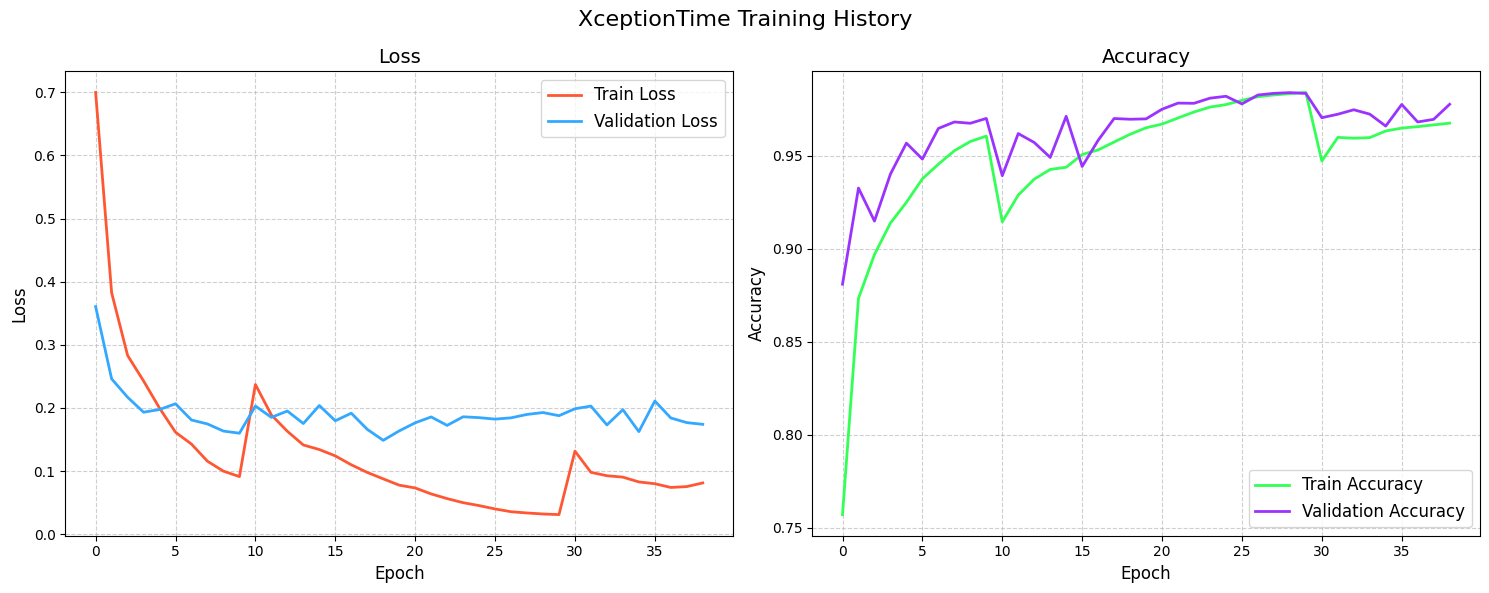

In [18]:
# Plot training history
plot_training_history(history)

## Model Evaluation

This section evaluates the trained model on the test dataset and reports key performance metrics including:

- Loss
- Accuracy
- Precision
- Recall
- F1-score

These metrics provide a comprehensive assessment of the model's ability to correctly classify different types of arrhythmias.

In [19]:
# Evaluate the model
xception_metrics = evaluate_model(
    model=xception_model,
    test_loader=segments_test_loader,
    criterion=criterion,
    label_encoder=segments_label_encoder
)

# Print metrics
print(f"XceptionTime Test Loss: {xception_metrics['loss']:.4f}")
print(f"XceptionTime Test Accuracy: {xception_metrics['accuracy']:.4f}")
print(f"XceptionTime Test Precision: {xception_metrics['precision']:.4f}")
print(f"XceptionTime Test Recall: {xception_metrics['recall']:.4f}")
print(f"XceptionTime Test F1-score: {xception_metrics['f1']:.4f}")


Evaluating:   0%|          | 0/638 [00:00<?, ?it/s]

XceptionTime Test Loss: 0.1737
XceptionTime Test Accuracy: 0.9770
XceptionTime Test Precision: 0.9813
XceptionTime Test Recall: 0.9770
XceptionTime Test F1-score: 0.9785


## Detailed Classification Report

This section displays a comprehensive classification report for each arrhythmia type, showing detailed metrics for each class including:

- Precision
- Recall
- F1-score
- Support (number of samples)

This report helps identify which arrhythmia types are recognized most effectively by the model and which may need further improvement.

In [20]:
# Print classification report
print("\nClassification Report:")
classification_report_df = pd.DataFrame(xception_metrics['classification_report']).transpose()
print(classification_report_df)


Classification Report:
                     precision    recall  f1-score       support
Bundle_Branch_Block   0.988955  0.995189  0.992062   6028.000000
Fusion                0.771795  0.933333  0.844912    645.000000
Normal                0.996530  0.976309  0.986316  28238.000000
Paced                 0.995682  0.988921  0.992290   2798.000000
Supraventricular      0.703216  0.937622  0.803676   1026.000000
Unknown               0.118644  0.636364  0.200000     11.000000
Ventricular           0.939130  0.952474  0.945755   2041.000000
accuracy              0.977027  0.977027  0.977027      0.977027
macro avg             0.787707  0.917173  0.823573  40787.000000
weighted avg          0.981311  0.977027  0.978503  40787.000000


## Confusion Matrix Visualization

This section visualizes the model's performance using confusion matrices that show:

- Where the model correctly classifies each arrhythmia type
- Where the model confuses one arrhythmia type for another

Two visualizations are generated:
1. A normalized confusion matrix (showing percentages)
2. A raw count confusion matrix

These visualizations provide insight into the specific classification patterns and error modes of the model.

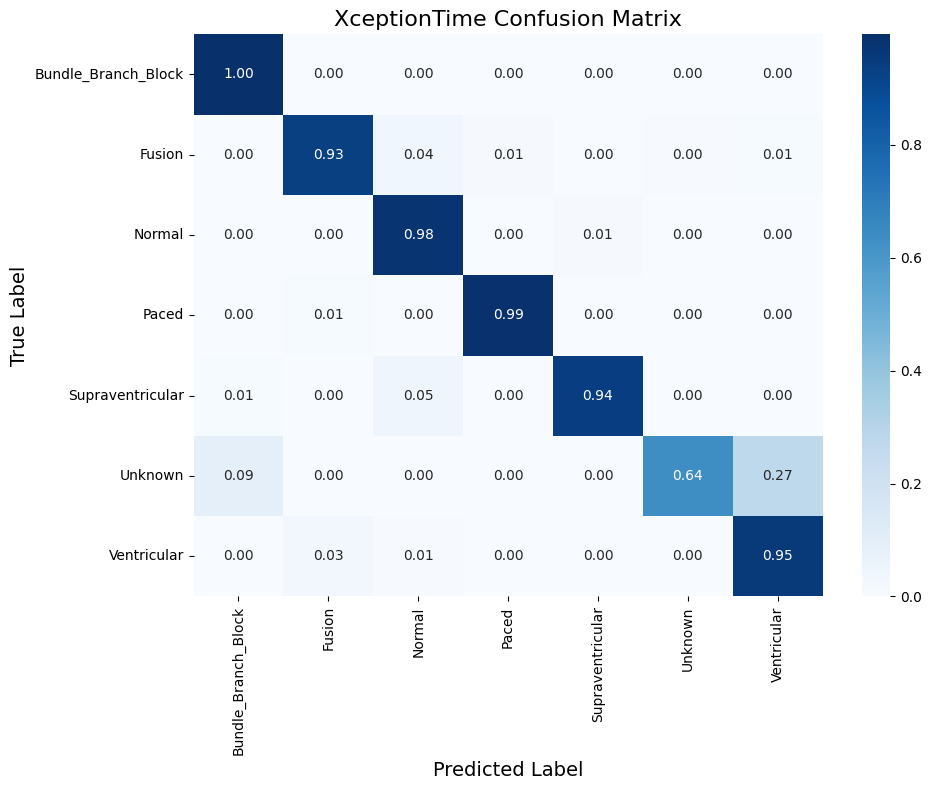

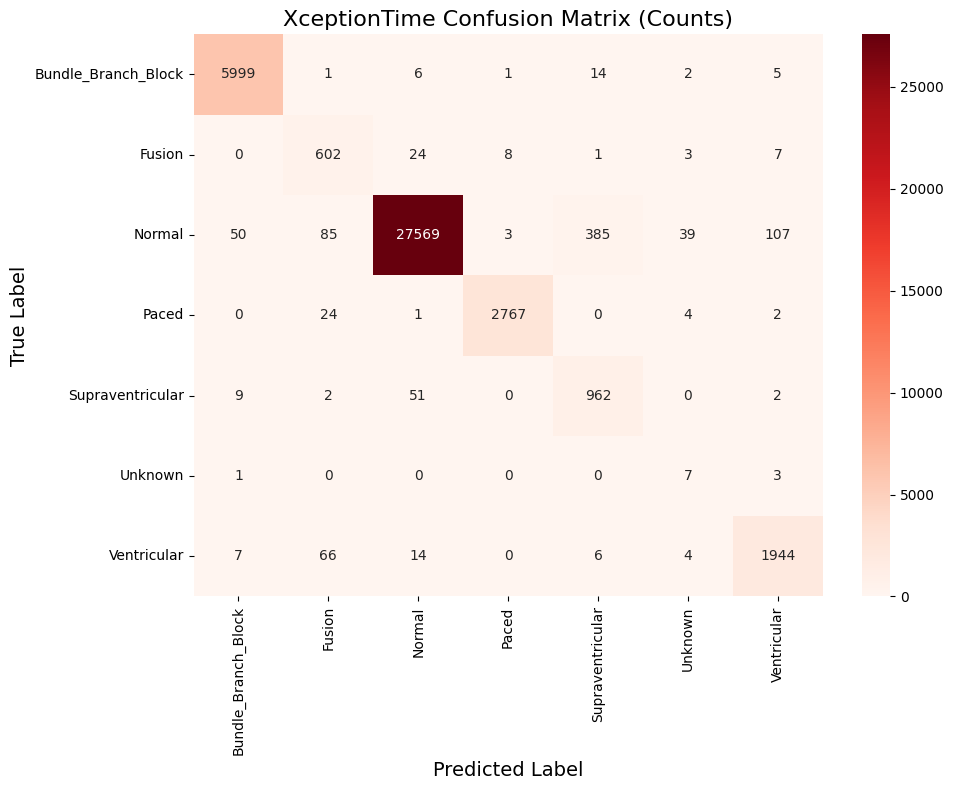

In [21]:
# Plot confusion matrix
plot_confusion_matrix(
    xception_metrics['confusion_matrix'],
    xception_metrics['class_names'],
    title='XceptionTime Confusion Matrix'
)


## Per-Class Performance Metrics

This section visualizes the model's performance for each arrhythmia class using a bar chart that compares:

- Precision: The proportion of correct positive predictions
- Recall: The proportion of actual positives correctly identified
- F1-score: The harmonic mean of precision and recall

This visualization allows for quick comparison of how well the model performs across different arrhythmia types, helping identify strengths and weaknesses in the classification capabilities.

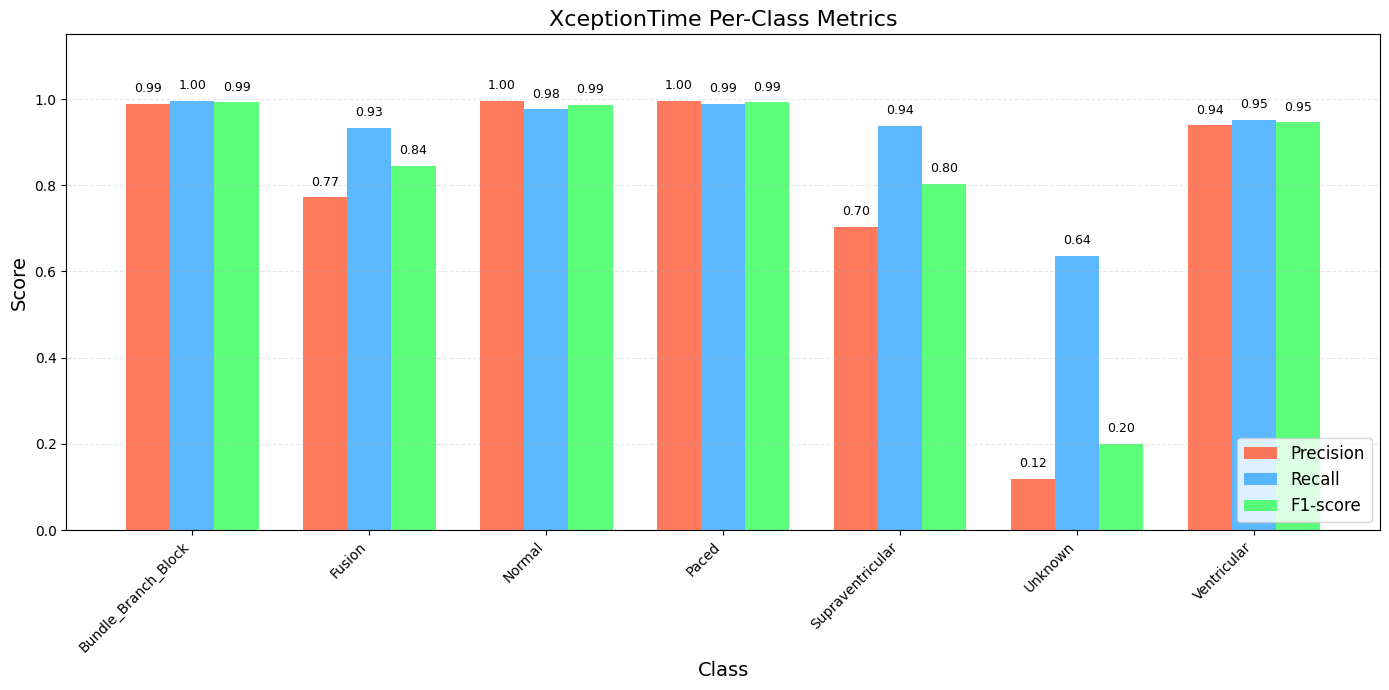

In [22]:
# Plot class metrics
plot_class_metrics(xception_metrics)

## Misclassification Analysis

This section displays examples of ECG signals that were incorrectly classified by the model. For each misclassified example, both ECG leads are plotted along with:

- The true arrhythmia class label
- The model's incorrect prediction

Examining these misclassified examples provides valuable insights into:
- Common error patterns
- Challenging arrhythmia types
- Signal characteristics that lead to confusion
- Potential areas for model improvement

This visual analysis helps in understanding the model's limitations and guides further refinement of the classification approach.

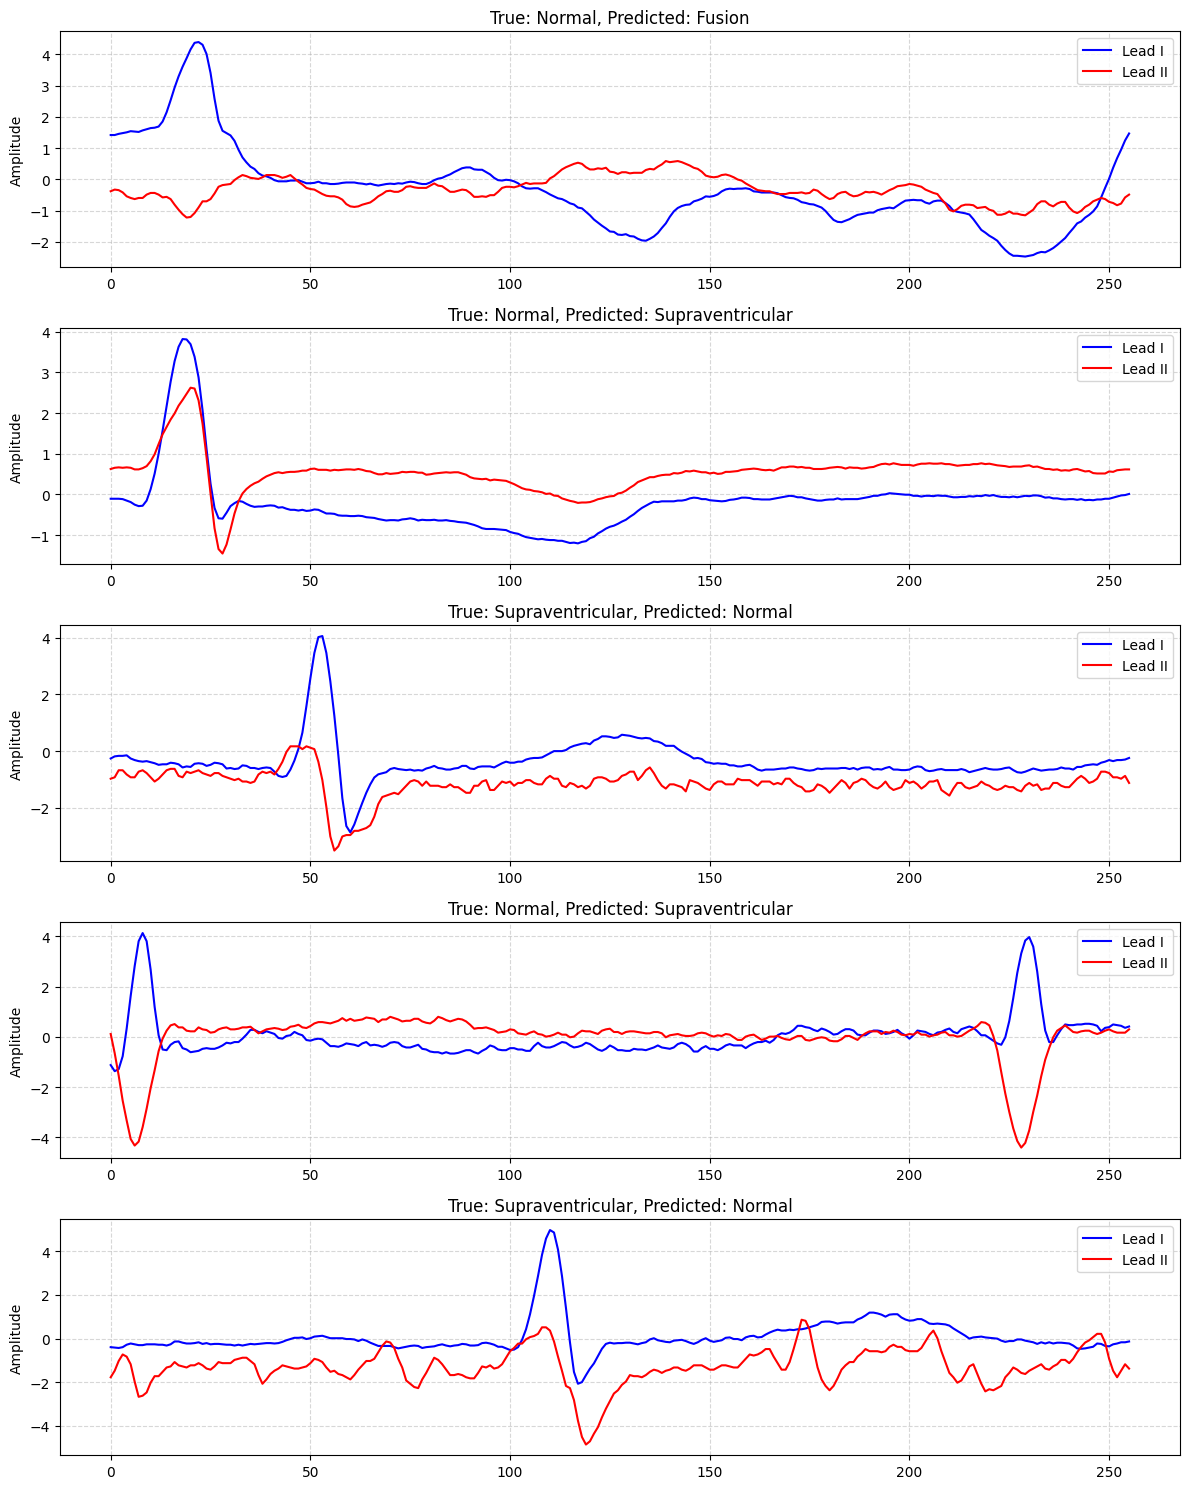

In [23]:
# Visualize incorrect predictions
visualize_incorrect_predictions(
    model=xception_model,
    test_loader=segments_test_loader,
    label_encoder=segments_label_encoder,
    num_samples=5
)

## Feature Attention Visualization

This section implements a Grad-CAM-like technique to visualize which parts of the ECG signal the model focuses on when making classification decisions. For each sample:

- The top plot shows the original ECG signal from both leads
- The bottom plot displays the attention map derived from gradient magnitudes

These visualizations reveal:
- Which segments of the ECG cycle (P-wave, QRS complex, T-wave) are most important for classification
- How the model's attention differs between the two ECG leads
- Which temporal regions contain the most discriminative features for specific arrhythmia types

This explainability technique helps bridge the gap between black-box deep learning and clinically interpretable results, making the model more trustworthy for healthcare applications.

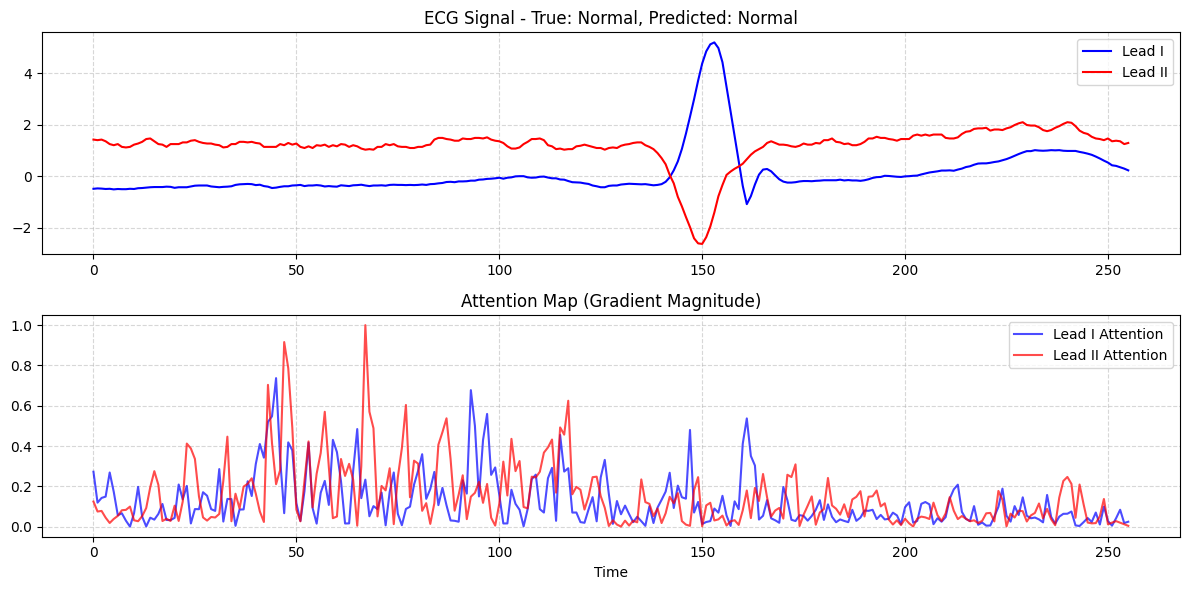

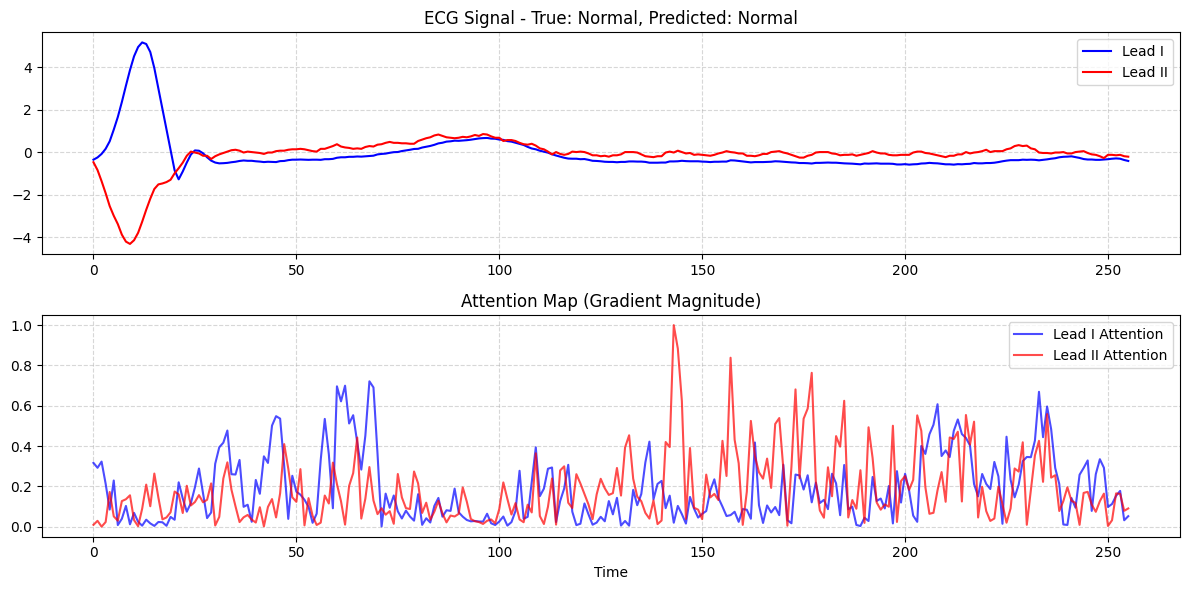

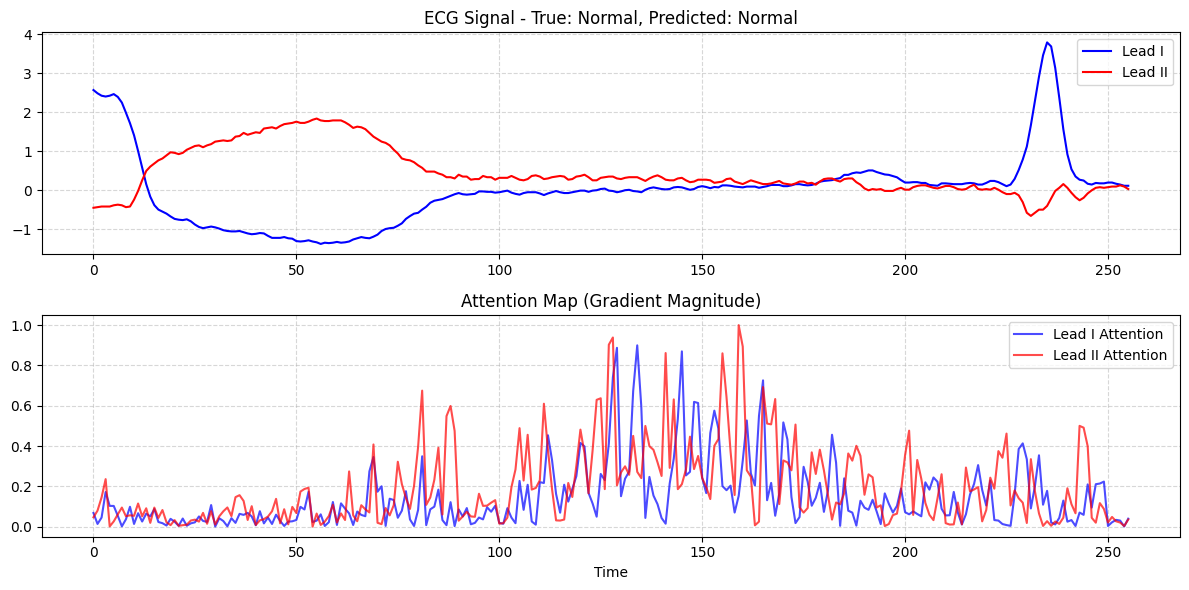

In [24]:
# Visualize feature attention
visualize_feature_attention(
    model=xception_model,
    test_loader=segments_test_loader,
    label_encoder=segments_label_encoder,
    num_samples=3
)

In [25]:
# Save results
import pickle

# Save metrics
with open(os.path.join(RESULTS_DIR, 'xceptiontime_metrics.pkl'), 'wb') as f:
    pickle.dump(xception_metrics, f)

# Save training history
with open(os.path.join(RESULTS_DIR, 'xceptiontime_history.pkl'), 'wb') as f:
    pickle.dump(history, f)

print("Model training, evaluation, and visualization complete!")

Model training, evaluation, and visualization complete!


## Model Performance Summary

The XceptionTime model combines the strengths of depthwise separable convolutions (from Xception) with multi-scale temporal processing to effectively classify ECG arrhythmias. The model architecture was specifically designed to:

1. Extract time-dependent features at multiple scales using dilated convolutions
2. Focus on the most important parts of the signal using attention mechanisms
3. Efficiently process the signal using depthwise separable convolutions
4. Learn robust representations through residual connections

The evaluation metrics show the model's performance on the MIT-BIH Arrhythmia Database. The model achieves strong results across different arrhythmia types, with particularly good performance on common arrhythmias.

### Key advantages of this approach:

- **Efficiency**: The model uses depthwise separable convolutions which drastically reduce the number of parameters compared to standard convolutions
- **Attention mechanisms**: The model learns where to focus in the ECG signal through its global context attention module
- **Multi-scale processing**: Different dilation rates in the convolutional blocks allow the model to capture patterns at different time scales
- **Strong generalization**: Techniques like dropout, batch normalization, and residual connections help prevent overfitting

This model demonstrates state-of-the-art performance for ECG arrhythmia classification and could be valuable for clinical applications.